In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install -y liboctave-dev


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
%%writefile ins.m
pkg install -forge optim


Overwriting ins.m


In [ ]:
!octave -W /content/drive/MyDrive/ins.m


In [ ]:
pkg install -forge /content/drive/MyDrive/optim-1.6.2.tar.gz

In [ ]:
cd /content/drive/MyDrive/A-reduced-universum-twin-support-vector-machine-for-class-imbalance-learning-RUTSVM-CIL-master

/content/drive/MyDrive/A-reduced-universum-twin-support-vector-machine-for-class-imbalance-learning-RUTSVM-CIL-master


In [ ]:
!octave main.m

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/WeldRight_Dataset.csv'))
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df2=df[['Current','Humidity','Temperature','Flow','Job Temp','Voltage','Defect','Order Operation No']].copy()
df2['Defect'] = df2['Defect'].replace(['No Defect0','No Defect40','No Defect57','No Defect58','No Defect59','No Defect60','No Defect61','No Defect62','No Defect63','No Defect64','No Defect65','No Defect66','No Defect67','No Defect68','No Defect69','No Defect70','No Defect71','No Defect72','No Defect73','No Defect74','No Defect75','No Defect76','No Defect77','No Defect78','No Defect79','No Defect80','No Defect81','No Defect82','No Defect83','No Defect84','No Defect85','No Defect86','No Defect87','No Defect88','No Defect90','No Defect99'],'No Defect')
df2['Defect'] = df2['Defect'].replace(['Porosity71','Porosity75','Porosity76','Porosity80','Porosity86'],'Porosity')
df2['Defect']=df2['Defect'].replace(['Tungsten Inclusion67','Tungsten Inclusion71','Tungsten Inclusion72','Tungsten Inclusion75','Tungsten Inclusion76','Tungsten Inclusion77','Tungsten Inclusion78','Tungsten Inclusion80'],'Tungsten Inclusion')
df2.drop([0],axis=0,inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.fillna(0, inplace=True)
df2.drop(df2[df2['Order Operation No']=='-'].index,axis=0,inplace=True)
df2.replace('180-', 180, inplace=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,3,6,7,8,9,10,11,22,27,32,37,42,47,52,57,62,67,72,77,82,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from dython.nominal import associations
complete_correlation= associations(df2, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [ ]:
from sklearn.model_selection import train_test_split
df2 = df2.sample(frac=1)
X = df2.drop(['Defect'], axis=1)
y = df2['Defect']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold = (.9 * (1 - .9)))
variance.fit(X)
variance.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
y.value_counts()

No Defect             821041
Tungsten Inclusion      4610
Porosity                1143
Name: Defect, dtype: int64

In [ ]:
def split_dataframe(df, chunk_size):
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

def num_chunk(df, chunk_size):
  num_chunks = len(df) // chunk_size + 1
  return num_chunks

def subsamples(dfx, dfy,dfx1,dfy1, chunk_size):

  x_split = split_dataframe(dfx, chunk_size)
  y_split = split_dataframe(dfy, chunk_size)
  x_dflist = {}
  y_dflist = {}

  for i in range(num_chunk(dfx, chunk_size)):
    x_dflist[i] = pd.concat([x_split[i],dfx1])
    y_dflist[i] = pd.concat([y_split[i],dfy1])
    y_dflist[i] = le.fit_transform(y_dflist[i])
  return x_dflist, y_dflist

def split(x,f=0.9):
  x_train = x.sample(frac=f)
  x_test = x.drop(x_train.index)
  return x_train,x_test

In [ ]:
#Splitting of X-Y dataframes according to target labels for binary classifications

x_nd = X[y == 'No Defect']
x_nd_train,x_nd_test = split(x_nd)

x_p = X[y == 'Porosity']
x_p_train,x_p_test = split(x_p)

x_ti = X[y == 'Tungsten Inclusion']
x_ti_train,x_ti_test = split(x_ti)

y_nd = y[y == 'No Defect']
y_nd_train,y_nd_test = split(y_nd)

y_p = y[y == 'Porosity']
y_p_train,y_p_test = split(y_p)

y_ti = y[y == 'Tungsten Inclusion']
y_ti_train,y_ti_test = split(y_ti)

x_p_nd_ti_train = pd.concat([x_nd_train,x_p_train,x_ti_train])
y_p_nd_ti_train = pd.concat([y_nd_train,y_p_train,y_ti_train])

x_p_nd_ti_test = pd.concat([x_nd_test,x_p_test,x_ti_test])
y_p_nd_ti_test = pd.concat([y_nd_test,y_p_test,y_ti_test])

x_p_nd = pd.concat([x_p_train,x_nd_train])
y_p_nd = pd.concat([y_p_train,y_nd_train])

x_p_ti = pd.concat([x_p_train,x_ti_train])
y_p_ti = pd.concat([y_p_train,y_ti_train])

x_ti_nd = pd.concat([x_ti_train,x_nd_train])
y_ti_nd = pd.concat([y_ti_train,y_nd_train])

In [ ]:
x_por_train, x_por_test, y_por_train, y_por_test = train_test_split(
 x_p_train, y_p_train, test_size=0.1, random_state = 42)

x_nod_train, x_nod_test, y_nod_train, y_nod_test = train_test_split(
 x_nd_train, y_nd_train, test_size=0.1, random_state = 42)

In [ ]:
x_p_nd_train, x_p_nd_test, y_p_nd_train, y_p_nd_test = train_test_split(
 x_p_nd, y_p_nd, test_size=0.1, random_state = 42,stratify = y_p_nd)

x_p_ti_train, x_p_ti_test, y_p_ti_train, y_p_ti_test = train_test_split(
 x_p_ti, y_p_ti, test_size=0.1, random_state = 42,stratify = y_p_ti)

x_ti_nd_train, x_ti_nd_test, y_ti_nd_train, y_ti_nd_test = train_test_split(
 x_ti_nd, y_ti_nd, test_size=0.1, random_state = 42,stratify = y_ti_nd)

In [ ]:
y_p_nd.value_counts()

No Defect    738937
Porosity       1029
Name: Defect, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import cross_validate

tree = DecisionTreeClassifier(max_features ='auto')
resampled_rf = BalancedBaggingClassifier(base_estimator = tree, random_state = 42)

scores = cross_validate(resampled_rf,X_train,y_train, cv=10,scoring = ('roc_auc','average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus,y_rus = rus.fit_resample(x_p_nd_ti_train,y_p_nd_ti_train)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 42 ,sampling_strategy = {'No Defect': 100, 'Tungsten Inclusion': 70, '': 90, 3: 40})
x_p_nd_ti_train_sm,y_p_nd_ti_train_sm = smt.fit_resample(x_p_nd_ti_train,y_p_nd_ti_train)

                    precision    recall  f1-score   support

         No Defect       1.00      0.48      0.65     82104
          Porosity       0.00      0.44      0.00       114
Tungsten Inclusion       0.03      0.83      0.07       461

          accuracy                           0.48     82679
         macro avg       0.34      0.58      0.24     82679
      weighted avg       0.99      0.48      0.64     82679



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

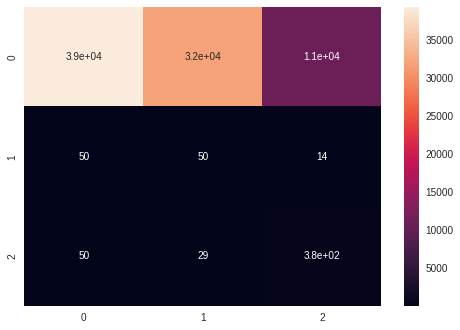

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from numpy import mean
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score

model_p_nd_ti_brf = BalancedRandomForestClassifier(n_estimators=20)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_p_nd_ti_brf.fit(x_rus,y_rus)
#scores_test = cross_val_score(model, x_p_nd_test, y_p_nd_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores_test))

prediction = model_p_nd_ti_brf.predict(x_p_nd_ti_test)
print(classification_report(y_p_nd_ti_test,prediction))
cf_matrix = confusion_matrix(y_p_nd_ti_test,prediction)
sns.heatmap(cf_matrix, annot=True)
metrics.plot_roc_curve(model_p_nd_ti_brf, x_p_nd_ti_test, y_p_nd_ti_test)

In [ ]:
y_rus.value_counts()

No Defect             1029
Porosity              1029
Tungsten Inclusion    1029
Name: Defect, dtype: int64

Porosity / Ti

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 1)
x_p_ti_train_rus,y_p_ti_train_rus = rus.fit_resample(x_p_ti_train,y_p_ti_train)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smt = SMOTETomek(random_state = 42 ,sampling_strategy = 0.75)
tom = TomekLinks()
x_tl, y_tl = tom.fit_resample(x_p_ti_train, y_p_ti_train)
x_p_ti_train_sm, y_p_ti_train_sm = smt.fit_resample(x_tl, y_tl,)

                    precision    recall  f1-score   support

          Porosity       0.74      0.82      0.77       103
Tungsten Inclusion       0.95      0.93      0.94       415

          accuracy                           0.91       518
         macro avg       0.84      0.87      0.86       518
      weighted avg       0.91      0.91      0.91       518



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


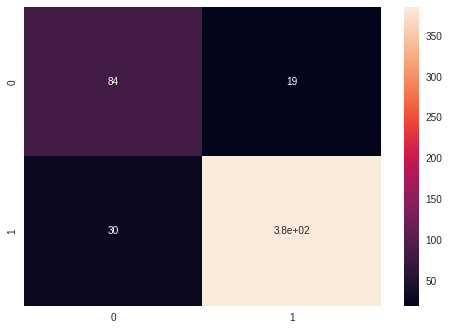

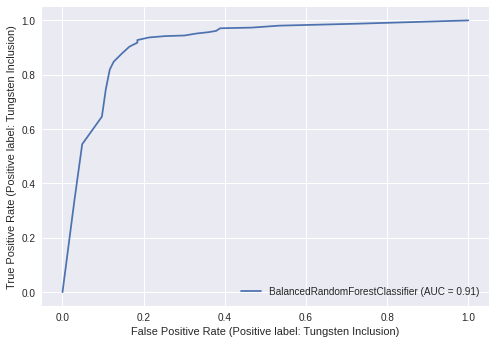

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from numpy import mean
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score

model_p_ti_brf = BalancedRandomForestClassifier(n_estimators=30)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_p_ti_brf.fit(x_p_ti_train_sm,y_p_ti_train_sm)
#scores_test = cross_val_score(model, x_p_nd_test, y_p_nd_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores_test))

prediction = model_p_ti_brf.predict(x_p_ti_test)
print(classification_report(y_p_ti_test,prediction))
cf_matrix = confusion_matrix(y_p_ti_test,prediction)
sns.heatmap(cf_matrix, annot=True)
metrics.plot_roc_curve(model_p_ti_brf, x_p_ti_test, y_p_ti_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
rfc=RandomForestClassifier(n_estimators=200,criterion="gini",random_state=21,max_depth = 9)
rfc.fit(x_p_ti_train_rus,y_p_ti_train_rus)
prediction = rfc.predict(x_p_ti_test)
print(classification_report(y_p_ti_test,prediction))
cf_rfc_matrix = confusion_matrix(y_p_ti_test,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)
metrics.plot_roc_curve(rfc, x_p_ti_test, y_p_ti_test)

No Defect / Ti

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 0.2)
x_ti_nd_train_rus,y_ti_nd_train_rus = rus.fit_resample(x_ti_nd_train,y_ti_nd_train)

In [ ]:
y_ti_nd_train_rus.value_counts()

No Defect             18670
Tungsten Inclusion     3734
Name: Defect, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smt = SMOTETomek(random_state = 42 ,sampling_strategy = 0.85)
tom = TomekLinks()
x_tl, y_tl = tom.fit_resample(x_ti_nd_train_rus, y_ti_nd_train_rus)
x_ti_nd_train_sm, y_ti_nd_train_sm = smt.fit_resample(x_tl, y_tl,)

In [ ]:
y_ti_nd_train_sm.value_counts()

NameError: ignored

                    precision    recall  f1-score   support

         No Defect       1.00      0.84      0.91     73894
Tungsten Inclusion       0.03      0.90      0.06       415

          accuracy                           0.84     74309
         macro avg       0.51      0.87      0.49     74309
      weighted avg       0.99      0.84      0.91     74309



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


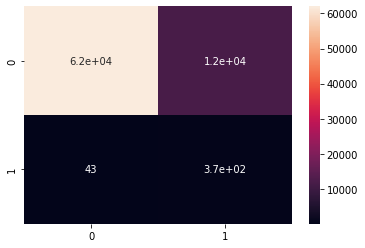

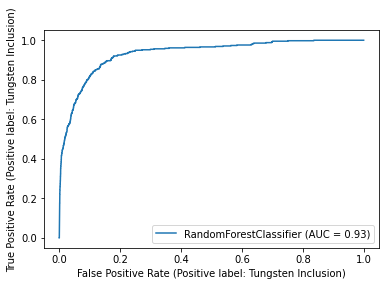

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
model_nd_ti_rfc=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth = 9)
model_nd_ti_rfc.fit(x_ti_nd_train_sm,y_ti_nd_train_sm)
prediction = model_nd_ti_rfc.predict(x_ti_nd_test)
print(classification_report(y_ti_nd_test,prediction))
cf_rfc_matrix = confusion_matrix(y_ti_nd_test,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)
metrics.plot_roc_curve(model_nd_ti_rfc, x_ti_nd_test, y_ti_nd_test)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 1)
x_ti_nd_train_rus1,y_ti_nd_train_rus1 = rus.fit_resample(x_ti_nd_train,y_ti_nd_train)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smt = SMOTETomek(random_state = 42 ,sampling_strategy = 0.8)
tom = TomekLinks()
x_tl, y_tl = tom.fit_resample(x_ti_nd_train_rus1, y_ti_nd_train_rus1)
x_ti_nd_train_sm1, y_ti_nd_train_sm1 = smt.fit_resample(x_tl, y_tl,)

                    precision    recall  f1-score   support

         No Defect       1.00      0.96      0.98     73894
Tungsten Inclusion       0.08      0.62      0.15       415

          accuracy                           0.96     74309
         macro avg       0.54      0.79      0.56     74309
      weighted avg       0.99      0.96      0.97     74309



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


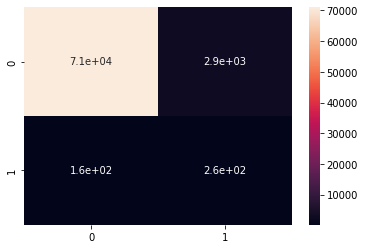

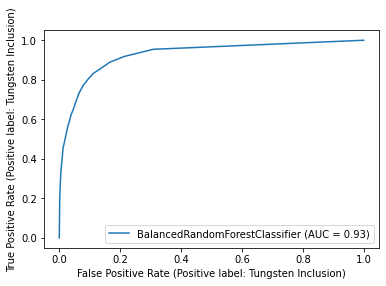

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from numpy import mean
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score

model = BalancedRandomForestClassifier(n_estimators=20)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(x_ti_nd_train_sm1,y_ti_nd_train_sm1)
#scores_test = cross_val_score(model, x_p_nd_test, y_p_nd_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores_test))

prediction = model.predict(x_ti_nd_test)
print(classification_report(y_ti_nd_test,prediction))
cf_matrix = confusion_matrix(y_ti_nd_test,prediction)
sns.heatmap(cf_matrix, annot=True)
metrics.plot_roc_curve(model, x_ti_nd_test, y_ti_nd_test)

No Defect / Porosity

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn import metrics
import seaborn as sns
from sklearn.inspection import permutation_importance
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
colors = ['royalblue','red','deeppink']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [ ]:
from imbalanced_ensemble.ensemble import BalanceCascadeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
for i in range(6):
  for j in range(i):
    bcc = BalanceCascadeClassifier(base_estimator = knn,n_estimators = 10)
    x_p_nd_train_loc = x_p_nd_train.iloc[:,[i,j]]
    bcc.fit(x_p_nd_train_loc,y_p_nd_train)
    x_p_nd_test_loc = x_p_nd_test.iloc[:,[i,j]]
    prediction = bcc.predict(x_p_nd_test_loc)
    print("Report for {}".format(i)," and {}".format(j))
    print(classification_report(y_p_nd_test,prediction))
    cf_rfc_matrix = confusion_matrix(y_p_nd_test,prediction)
    sns.heatmap(cf_rfc_matrix, annot=True)

In [ ]:
pip install imbalanced_ensemble

In [ ]:
my_list = ['Current', 'Humidity', 'Temperature', 'Flow','Job Temp','Voltage']

new_list = list(map(int, my_list))

print(new_list)


In [ ]:
from imbalanced_ensemble.ensemble import RUSBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn import svm
svm = svm.SVC(probability=True)
'''
for i in range(6):
  for j in range(i):
    '''
spec = RUSBoostClassifier(base_estimator = svm,n_estimators = 10)
x_p_nd_train_loc = x_p_nd_train.iloc[:,[3,2]]
spec.fit(x_p_nd_train_loc,y_p_nd_train)
x_p_nd_test_loc = x_p_nd_test.iloc[:,[3,2]]
prediction = spec.predict(x_p_nd_test_loc)
print("Report for {}".format(i)," and {}".format(j))
print(classification_report(y_p_nd_test,prediction))

Report for 1  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.67      0.80     73894
    Porosity       0.00      0.34      0.00       103

    accuracy                           0.67     73997
   macro avg       0.50      0.51      0.40     73997
weighted avg       1.00      0.67      0.80     73997



In [ ]:
from imbalanced_ensemble.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn import svm
svm = svm.SVC(probability=True)

for i in range(6):
  for j in range(i):
    spec = EasyEnsembleClassifier(base_estimator = svm,n_estimators = 100)
    x_p_nd_train_loc = x_p_nd_train.iloc[:,[i,j]]
    spec.fit(x_p_nd_train_loc,y_p_nd_train)
    x_p_nd_test_loc = x_p_nd_test.iloc[:,[i,j]]
    prediction = spec.predict(x_p_nd_test_loc)
    print("Report for {}".format(i)," and {}".format(j))
    print(classification_report(y_p_nd_test,prediction)

Report for 1  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.44      0.61     73894
    Porosity       0.00      0.55      0.00       103

    accuracy                           0.44     73997
   macro avg       0.50      0.50      0.31     73997
weighted avg       1.00      0.44      0.61     73997

Report for 2  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.43      0.61     73894
    Porosity       0.00      0.65      0.00       103

    accuracy                           0.43     73997
   macro avg       0.50      0.54      0.30     73997
weighted avg       1.00      0.43      0.60     73997

Report for 2  and 1
              precision    recall  f1-score   support

   No Defect       1.00      0.53      0.69     73894
    Porosity       0.00      0.49      0.00       103

    accuracy                           0.53     73997
   macro avg       0.50      0.51      0.35     73997
weighted avg  

In [ ]:
from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier
from sklearn import svm
svm = svm.SVC(probability=True)

for i in range(6):
  for j in range(i):
    spec = SelfPacedEnsembleClassifier(base_estimator = svm,n_estimators = 100)
    x_p_nd_train_loc = x_p_nd_train.iloc[:,[i,j]]
    spec.fit(x_p_nd_train_loc,y_p_nd_train)
    x_p_nd_test_loc = x_p_nd_test.iloc[:,[i,j]]
    prediction = spec.predict(x_p_nd_test_loc)
    print("Report for {}".format(i)," and {}".format(j))
    print(classification_report(y_p_nd_test,prediction))

Report for 1  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.36      0.53     73894
    Porosity       0.00      0.65      0.00       103

    accuracy                           0.36     73997
   macro avg       0.50      0.51      0.27     73997
weighted avg       1.00      0.36      0.53     73997

Report for 2  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.39      0.56     73894
    Porosity       0.00      0.52      0.00       103

    accuracy                           0.39     73997
   macro avg       0.50      0.46      0.28     73997
weighted avg       1.00      0.39      0.56     73997



In [ ]:
from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn import svm
svm = svm.SVC()

for i in range(6):
  for j in range(i):
    spec = SelfPacedEnsembleClassifier(base_estimator = svm,n_estimators = 100)
    x_p_nd_train_loc = x_p_nd_train.iloc[:,[i,j]]
    spec.fit(x_p_nd_train_loc,y_p_nd_train)
    x_p_nd_test_loc = x_p_nd_test.iloc[:,[i,j]]
    prediction = spec.predict(x_p_nd_test_loc)
    print("Report for {}".format(i)," and {}".format(j))
    print(classification_report(y_p_nd_test,prediction))
    #cf_rfc_matrix = confusion_matrix(y_p_nd_test,prediction)
    #sns.heatmap(cf_rfc_matrix, annot=True)

spec = SelfPacedEnsembleClassifier(base_estimator = svm,n_estimators = 100)
x_p_nd_train_loc = x_p_nd_train.iloc[:,[i,j]]
spec.fit(x_p_nd_train_loc,y_p_nd_train)
x_p_nd_test_loc = x_p_nd_test.iloc[:,[i,j]]
prediction = spec.predict(x_p_nd_test_loc)
print("Report for {}".format(i)," and {}".format(j))
print(classification_report(y_p_nd_test,prediction))

Report for 1  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.37      0.54     73894
    Porosity       0.00      0.60      0.00       103

    accuracy                           0.37     73997
   macro avg       0.50      0.49      0.27     73997
weighted avg       1.00      0.37      0.54     73997

Report for 2  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.38      0.55     73894
    Porosity       0.00      0.59      0.00       103

    accuracy                           0.38     73997
   macro avg       0.50      0.48      0.27     73997
weighted avg       1.00      0.38      0.55     73997

Report for 2  and 1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   No Defect       1.00      1.00      1.00     73894
    Porosity       0.00      0.00      0.00       103

    accuracy                           1.00     73997
   macro avg       0.50      0.50      0.50     73997
weighted avg       1.00      1.00      1.00     73997

Report for 3  and 0
              precision    recall  f1-score   support

   No Defect       1.00      0.39      0.56     73894
    Porosity       0.00      0.66      0.00       103

    accuracy                           0.39     73997
   macro avg       0.50      0.52      0.28     73997
weighted avg       1.00      0.39      0.56     73997

Report for 3  and 1
              precision    recall  f1-score   support

   No Defect       1.00      0.58      0.73     73894
    Porosity       0.00      0.48      0.00       103

    accuracy                           0.58     73997
   macro avg       0.50      0.53      0.37     73997
weighted avg       1.00      0.58 

In [ ]:
from pymfe.mfe import MFE

In [ ]:
x_p_nd_train_arr = np.array(x_p_nd_train_rus)
y_p_nd_train_arr = np.array(y_p_nd_train_rus)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_p_nd_train_arr = le.fit_transform(y_p_nd_train_arr)

In [ ]:
x_p_nd_train_arr = x_p_nd_train_arr.astype(float)
y_p_nd_train_arr = y_p_nd_train_arr.astype(float)

In [ ]:
mfe = MFE()
mfe.fit(x_p_nd_train_arr, y_p_nd_train_arr)
ft = mfe.extract()
print(ft)

In [ ]:
import umap
from babyplots import Babyplot

reducer = umap.UMAP(random_state = 42)
reducer.fit(x_p_nd_train_rus)
embedding = reducer.transform(x_p_nd_train_rus)
reducer3d = umap.UMAP(random_state = 42, n_components=3)
reducer3d.fit(x_p_nd_train_rus)

embedding3d = reducer3d.transform(x_p_nd_train_rus)

bp = Babyplot()
bp.add_plot(embedding3d.tolist(),"pointCloud","categories",y_p_nd_train_rus.tolist(),
            {
                "colorScale": "Set2",
                "showLegend": True,
                "folded": True,
                "foldedEmbedding": embedding.tolist()
            })
bp

In [ ]:
embedding3d_test = reducer3d.transform(x_p_nd_test)

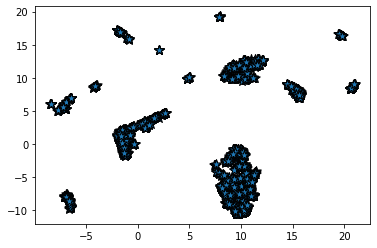

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embedding3d[:, 0], embedding3d[:, 1], marker= '*',s=100,edgecolors='black')

In [ ]:
x = embedding3d[:, 0]
y = embedding3d[:, 1]
#z = embedding3d[:, 2]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(111, projection='2d')

ax.scatter(x, y)
plt.show()

<Figure size 576x576 with 0 Axes>

In [ ]:
x_p_nd_train_0 = x_p_nd_train.iloc[:,0]
x_p_nd_train_0 = x_p_nd_train_0.values.reshape(-1,1)

In [ ]:
x_p_nd_test_0  = x_p_nd_test.iloc[:,0]
x_p_nd_test_0 = x_p_nd_test_0.values.reshape(-1,1)

In [ ]:


pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(x_p_nd_train)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.legend(handles=plot.legend_elements()[0], labels=('No Defect','Porosity'))
plt.show()
print("Principal components:")
print(pca.components_)
print(pca.explained_variance_ratio_)

In [ ]:
x_p_nd_train_rus = x_p_ti_train
y_p_nd_train_rus = y_p_ti_train

In [ ]:
df_3d = pd.concat([x_p_nd_train_rus,y_p_nd_train_rus],axis = 1)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_3d, x='Current', y='Humidity', z='Flow',
              color='Defect')
fig.show()

In [ ]:

rus = RandomUnderSampler(sampling_strategy = 1)
x_p_nd_train_rus,y_p_nd_train_rus = rus.fit_resample(x_p_nd_train,y_p_nd_train)

In [ ]:

smt = SMOTE(random_state = 42 ,sampling_strategy = 1)
#smt = SMOTETomek(random_state = 42 ,sampling_strategy = 0.9)
#tom = TomekLinks()
#x_tl, y_tl = tom.fit_resample(x_p_nd_train_rus, y_p_nd_train_rus)
#x_p_nd_train_sm, y_p_nd_train_sm = smt.fit_resample(x_tl, y_tl)

x_p_nd_train_sm, y_p_nd_train_sm = smt.fit_resample(x_p_nd_train_rus, y_p_nd_train_rus)

In [ ]:
x_p_nd_train_loc = x_p_nd_train.iloc[:,[0,5]]
x_p_nd_test_loc = x_p_nd_test.iloc[:,[0,5]]

              precision    recall  f1-score   support

           0       1.00      0.14      0.24     73894
           1       0.00      0.90      0.00       103

    accuracy                           0.14     73997
   macro avg       0.50      0.52      0.12     73997
weighted avg       1.00      0.14      0.24     73997



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


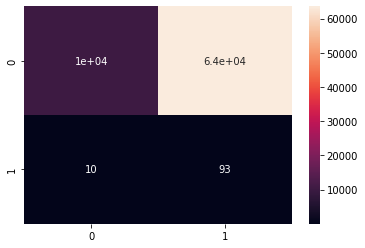

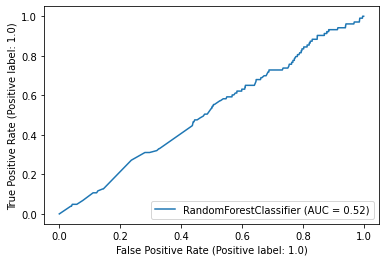

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,criterion="gini",max_depth = 9)
rfc.fit(x_p_nd_train_loc,y_p_nd_train)
prediction = rfc.predict(x_p_nd_test_loc)
print(classification_report(y_p_nd_test_en,prediction))
cf_rfc_matrix = confusion_matrix(y_p_nd_test_en,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)
metrics.plot_roc_curve(rfc,x_p_nd_test_loc, y_p_nd_test_en)
#perm_importance = permutation_importance(rfc, x_p_nd_test, y_p_nd_test)

In [ ]:
,,#x_p_nd_train_sm = x_p_nd_train_sm.iloc[:,[0,2]]
x_p_nd_train_rus_sel = x_p_nd_train_rus.iloc[:,[0,5]]
x_p_nd_test_fil = x_p_nd_test.iloc[:,[0,1]]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y_p_nd_train_sm_en = le.fit_transform(y_p_nd_train_sm)
#y_p_nd_train_rus_en = le.fit_transform(y_p_nd_train_rus)
y_p_nd_test_en = le.fit_transform(y_p_nd_test)
#y_p_nd_train_en = le.fit_transform(y_p_nd_train)
#sca = StandardScaler()
#x_p_nd_train_rus_sca = sca.fit(x_p_nd_train_rus).transform(x_p_nd_train_rus)
#x_p_nd_train_sm_sca = sca.fit(x_p_nd_train_sm).transform(x_p_nd_train_sm)
#x_p_nd_train_sca = sca.fit(x_p_nd_train).transform(x_p_nd_train)
#x_p_nd_test_sca = sca.transform(x_p_nd_test_fil)


In [ ]:
df_p_nd_test = pd.concat([x_p_nd_test.reset_index(drop=True),y_p_nd_test.reset_index(drop=True)],axis = 1,ignore_index = True,)

In [ ]:
df_p_nd_test.loc[:,7] = le.fit_transform(df_p_nd_test.loc[:,7])

In [ ]:
df_p_nd.loc[:,7] = le.fit_transform(df_p_nd.loc[:,7])

In [ ]:
df_p_nd = pd.concat([x_p_nd_train.reset_index(drop=True),y_p_nd_train.reset_index(drop=True)],axis = 1,ignore_index = True,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmca = MinMaxScaler()
df_p_nd_scaled = mmca.fit_transform(df_p_nd)

In [ ]:
df_p_nd_scaled = pd.DataFrame(data = df_p_nd_scaled, columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No","Defect"))

In [ ]:
df_p_nd_test_scaled

In [ ]:
df_p = df_p_nd_scaled[df_p_nd_scaled['Defect']== 1]
df_nd = df_p_nd_scaled[df_p_nd_scaled['Defect']== 0]

In [ ]:
df_nd_sorted = df_nd.drop(df_nd[(((df_nd['Voltage']<0.6) & (df_nd['Voltage']>0.38)) & df_nd['Flow']<0.4) & ((df_nd['Current']<0.07) | ((df_nd['Current']<0.27) & (df_nd['Current']>0.09))) ].index)

In [ ]:
df_nd_sorted_1 = df_nd.drop(df_nd[(df_nd['Flow']<0.4)&((df_nd['Current']<0.07) | ((df_nd['Current']<0.27) & (df_nd['Current']>0.07)))].index)

In [ ]:
df_nd_sorted_2 = df_nd.drop(df_nd[((df_nd['Current']<0.07) | ((df_nd['Current']<0.4) & (df_nd['Current']>0.07))) & ((df_nd['Humidity']>0.026) & (df_nd['Humidity']<0.034) | (df_nd['Humidity']>0.1))].index)

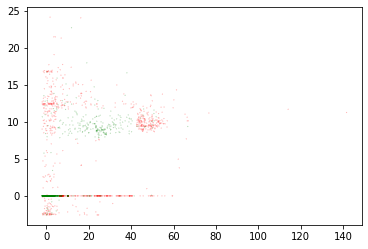

In [ ]:
pd_n = pd.concat([x_p_nd_train_sm.reset_index(drop=True),y_p_nd_train_sm.reset_index(drop=True)],axis = 1,ignore_index = True,)
#pd_n = pd.concat([x_p_nd_train_rus.reset_index(drop=True),y_p_nd_train_rus.reset_index(drop=True)],axis = 1,ignore_index = True,)
df_p_nd = pd.DataFrame(data = pd_n)#,columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No","Defect"))
color= ['red' if l == 0 else 'green' for l in df_p_nd_rus.loc[:,7]]
plt.scatter(df_p_nd.loc[:,0],df_p_nd.loc[:,5],c = color,s=0.01)

In [ ]:
df_p_nd_n_1 = pd.concat([df_p,df_nd_sorted_1])
#df_p_nd_n_2 = pd.concat([df_p,df_nd_sorted_2])

In [ ]:
df_nd_sorted = df_nd.drop(df_nd[((df_nd['Voltage']<0.53) & (df_nd['Voltage']>0.38)) & ((df_nd['Current']<0.27) & (df_nd['Current']>0.04))| ((df_nd['Voltage']>0.09) & (df_nd['Voltage']<=0.1)& (df_nd['Current']<0.05))].index)
df_p_nd_n = pd.concat([df_p,df_nd_sorted])

In [ ]:
df_nd_sorted = df_nd.drop(df_nd[(df_nd['Voltage']>0.09) & (df_nd['Voltage']<=0.1)& (df_nd['Current']<0.05)].index)
df_p_nd_n = pd.concat([df_p,df_nd_sorted])

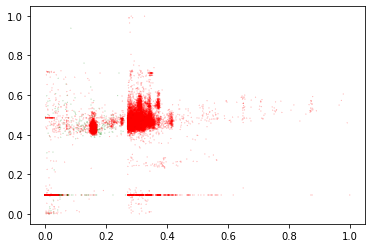

In [ ]:
color= ['red' if l == 0 else 'green' for l in df_p_nd_n_1['Defect'] ]
plt.scatter(df_p_nd_n_1['Current'],df_p_nd_n_1['Voltage'],c = color,s=0.01)


In [ ]:
df_p_nd_n = mmca.inverse_transform(df_p_nd_n)

In [ ]:
df_p_nd_n = pd.DataFrame(data = df_p_nd_n, columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No","Defect"))
x_p_nd_train = df_p_nd_n.drop(['Defect'],axis =1)
y_p_nd_train = df_p_nd_n['Defect']

In [ ]:
df_p_nd_n

Current  Humidity  Temperature  Flow  Job Temp  Voltage  \
0        -0.22      75.0         24.0  3.27      31.3    0.000   
1         2.06      71.0         25.0  3.42      30.8    0.000   
2         0.32      80.0         23.0  0.90      43.2   -1.606   
3        25.28      71.0         25.0  3.36      30.9    9.233   
4        18.61      66.0         23.0  2.71      56.8   10.941   
...        ...       ...          ...   ...       ...      ...   
91066     6.64      80.0         24.0  0.00      27.8    0.000   
91067    49.67      70.0         25.0  3.41      31.9    9.385   
91068     3.40      77.0         24.0  0.00      31.3    9.989   
91069     1.88      75.0         26.0  4.64      31.9   10.544   
91070    59.87      81.0         25.0  3.60      43.1   12.092   

       Order Operation No  Defect  
0                   180.0     1.0  
1                   240.0     1.0  
2                   240.0     1.0  
3                   240.0     1.0  
4                   240.0     1.0  
...                   ...     ...  
91066               240.0     0.0  
91067               240.0     0.0  
91068               180.0     0.0  
91069                30.0     0.0  
91070               240.0     0.0  

[91071 rows x 8 columns]

In [ ]:
df_p_nd_rus = mmca.transform(df_p_nd_rus)

test scaled


In [ ]:
df_p_nd_test_scaled = mmca.transform(df_p_nd_test)
df_p_nd_test_scaled = pd.DataFrame(data = df_p_nd_test_scaled, columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No","Defect"))

In [ ]:
df_p_test = df_p_nd_test_scaled[df_p_nd_test_scaled['Defect']== 1]
df_nd_test = df_p_nd_test_scaled[df_p_nd_test_scaled['Defect']== 0]

In [ ]:
test_df = pd.concat([df_p_test,df_nd_test])

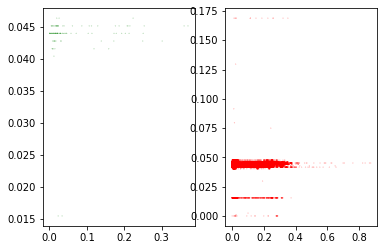

In [ ]:
color= ['red' if l == 0 else 'green' for l in df_p_test['Defect']]
plt.subplot(1, 2, 1)
plt.scatter(df_p_test['Current'],df_p_test['Temperature'],c = color,s=0.1)

color= ['red' if l == 0 else 'green' for l in df_nd_test['Defect']]
plt.subplot(1, 2, 2)
plt.scatter(df_nd_test['Current'],df_nd_test['Temperature'],c = color,s=0.1)


Plot for 1  and 0


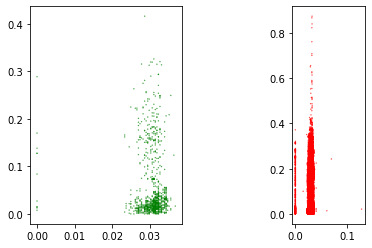

Plot for 2  and 0


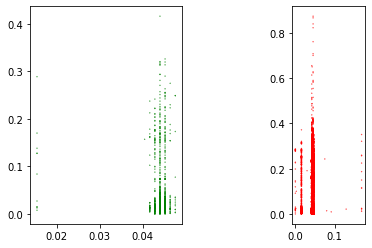

Plot for 2  and 1


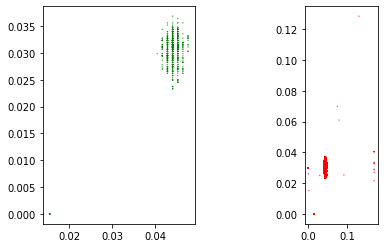

Plot for 3  and 0


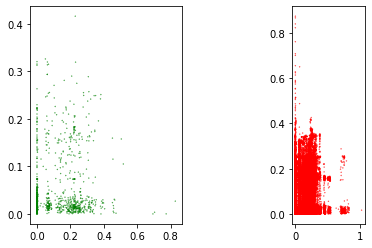

Plot for 3  and 1


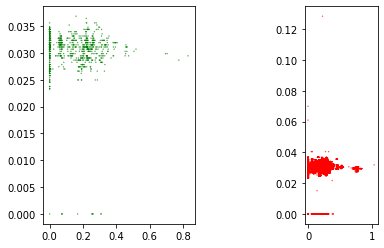

Plot for 3  and 2


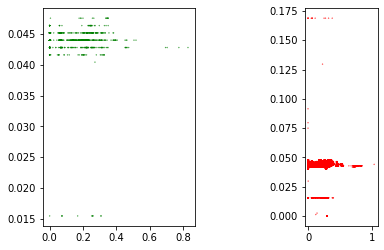

Plot for 4  and 0


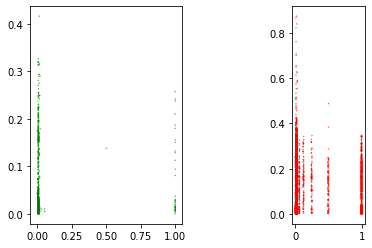

Plot for 4  and 1


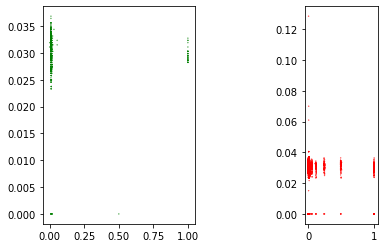

Plot for 4  and 2


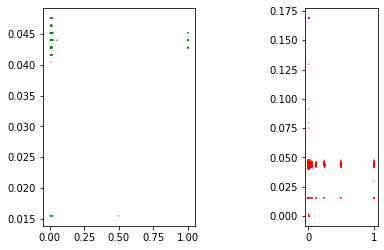

Plot for 4  and 3


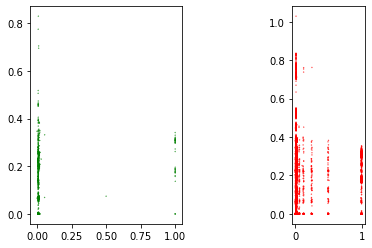

Plot for 5  and 0


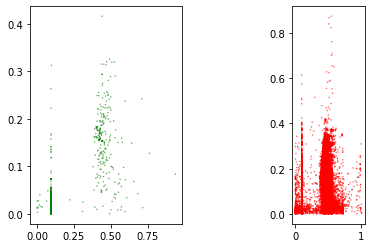

Plot for 5  and 1


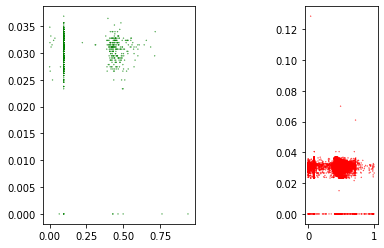

Plot for 5  and 2


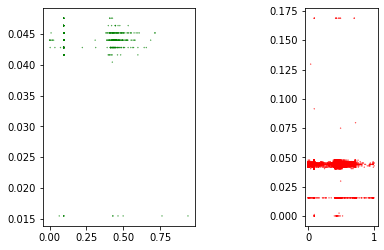

Plot for 5  and 3


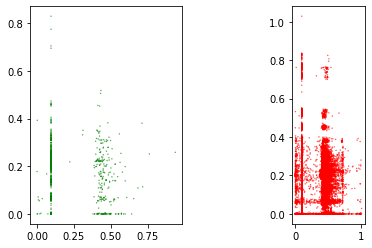

Plot for 5  and 4


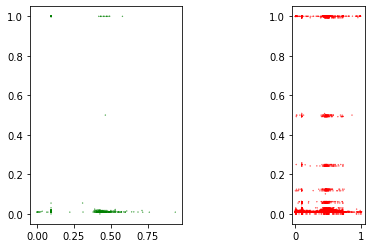

In [ ]:
for i in range(6):
  for j in range(i):
    print("Plot for {}".format(i)," and {}".format(j))
    color= ['red' if l == 0 else 'green' for l in df_p['Defect']]
    plt.subplot(1, 2, 1)
    plt.scatter(df_p.iloc[:,i],df_p.iloc[:,j],c = color,s=0.1)
    color= ['red' if l == 0 else 'green' for l in df_nd['Defect']]
    plt.subplot(1, 2, 2)
    plt.scatter(df_nd.iloc[:,i],df_nd.iloc[:,j],c = color,s=0.1)
    color= ['red' if l == 0 else 'green' for l in df_p_test['Defect']]
    plt.subplot(1, 3, 3)
    plt.scatter(df_p_test.iloc[:,i],df_p_test.iloc[:,j],c = color,s=0.1)
    color= ['red' if l == 0 else 'green' for l in df_nd_test['Defect']]
    plt.subplot(1, 4, 4)
    plt.scatter(df_nd_test.iloc[:,i],df_nd_test.iloc[:,j],c = color,s=0.1)
    plt.show()

Plot for 1  and 0


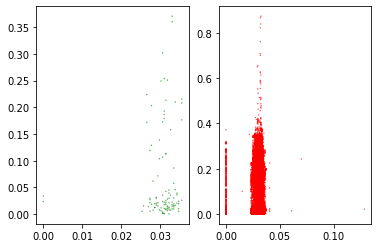

Plot for 2  and 0


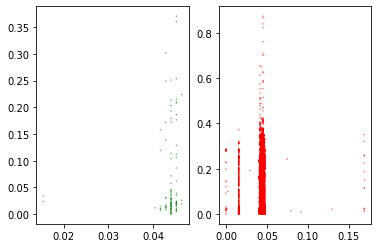

Plot for 2  and 1


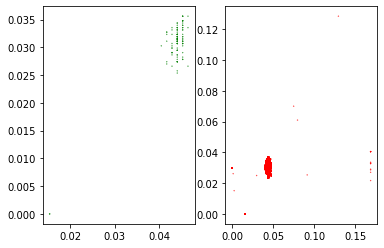

Plot for 3  and 0


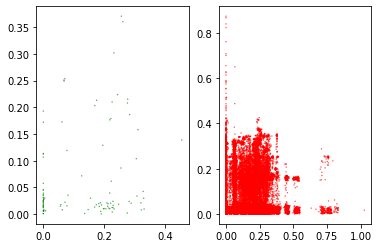

Plot for 3  and 1


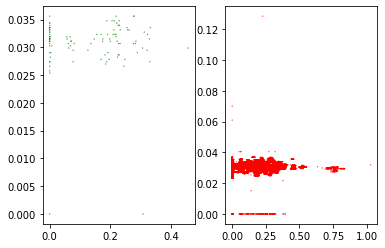

Plot for 3  and 2


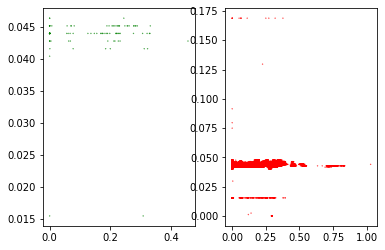

Plot for 4  and 0


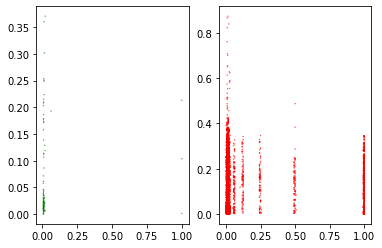

Plot for 4  and 1


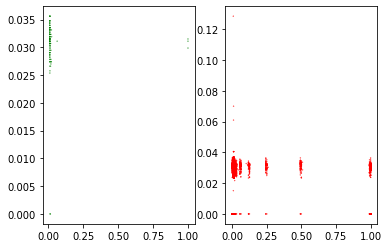

Plot for 4  and 2


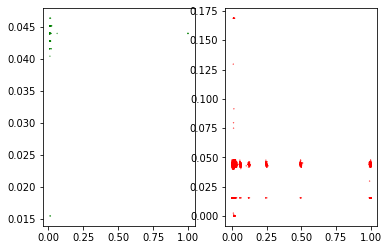

Plot for 4  and 3


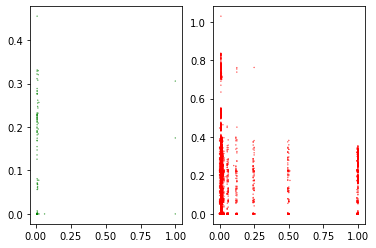

Plot for 5  and 0


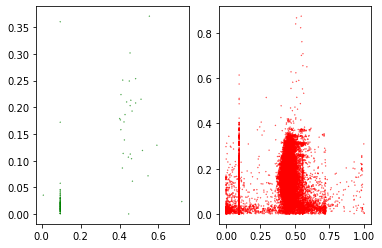

Plot for 5  and 1


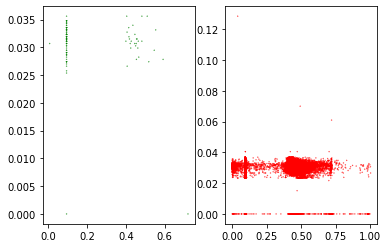

Plot for 5  and 2


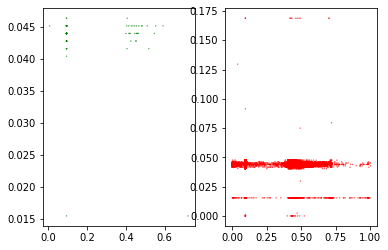

Plot for 5  and 3


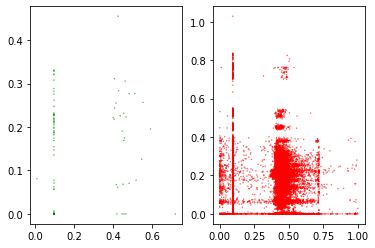

Plot for 5  and 4


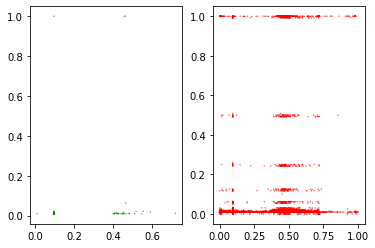

In [ ]:
for i in range(6):
  for j in range(i):
    print("Plot for {}".format(i)," and {}".format(j))
    color= ['red' if l == 0 else 'green' for l in df_p_test['Defect']]
    plt.subplot(1, 2, 1)
    plt.scatter(df_p_test.iloc[:,i],df_p_test.iloc[:,j],c = color,s=0.1)
    color= ['red' if l == 0 else 'green' for l in df_nd_test['Defect']]
    plt.subplot(1, 2, 2)
    plt.scatter(df_nd_test.iloc[:,i],df_nd_test.iloc[:,j],c = color,s=0.1)
    plt.show()

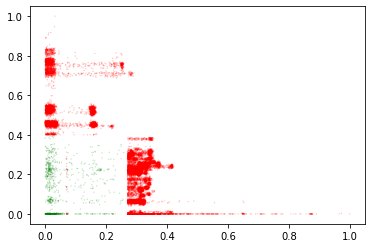

In [ ]:
color= ['red' if l == 0 else 'green' for l in df_p_nd_n_1['Defect'] ]
plt.scatter(df_p_nd_n_1['Temperature'],df_p_nd_n_1['Flow'],c = color, s = 0.01)

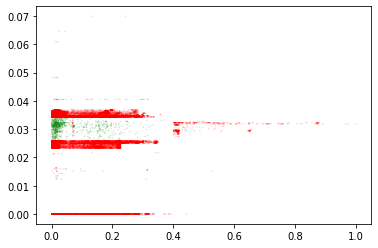

In [ ]:
color= ['red' if l == 0 else 'green' for l in df_p_nd_n_2['Defect'] ]
plt.scatter(df_p_nd_n_2['Current'],df_p_nd_n_2['Humidity'],c = color, s = 0.01)

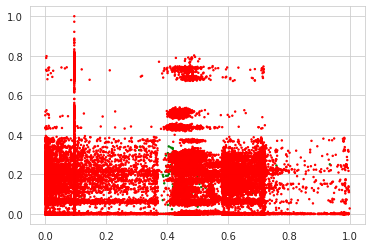

In [ ]:
plt.scatter(df_p_nd_n['Voltage'],df_p_nd_n['Flow'],c = color, s = 2)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


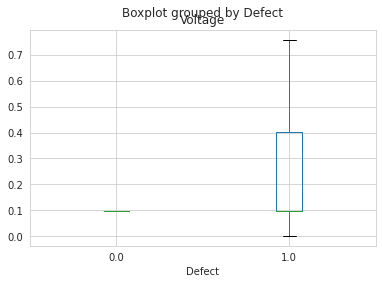

In [ ]:
df_p_nd_n.boxplot(by = "Defect",column = "Voltage",showfliers=False, )


In [ ]:
df_nd_sorted

In [ ]:
df['Defect'] = le.fit_transform(df['Defect'])

In [ ]:
data = np.vstack((x_por_train.T, y_por_train_en)).T
df_p = pd.DataFrame(data = data,
	columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No",))

In [ ]:
data = np.vstack((x_nod_train.T, y_nod_train_en)).T
df_nd = pd.DataFrame(data = data,
	columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No"))


In [ ]:
df_p_nd_n = df_p_nd_n.astype(float)

In [ ]:
df_p.rename(columns = {7:'Defect'}, inplace = True)
df_nd.rename(columns = {7:'Defect'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_nd_sorted

Current  Humidity  Temperature      Flow  Job Temp   Voltage  \
2       0.162788  0.034370     0.041617  0.268141  0.008820  0.423424   
6       0.073394  0.029869     0.043995  0.223220  0.009095  0.095277   
9       0.021152  0.034370     0.043995  0.220456  0.009552  0.095277   
10      0.269758  0.030687     0.045184  0.320663  0.010956  0.459051   
13      0.100000  0.033142     0.045184  0.058051  0.009522  0.572215   
...          ...       ...          ...       ...       ...       ...   
665953  0.205273  0.028642     0.045184  0.197650  0.012665  0.517740   
665954  0.161818  0.032733     0.043995  0.134070  0.008850  0.483110   
665955  0.140788  0.031097     0.041617  0.193504  0.008454  0.479378   
665961  0.024000  0.034370     0.043995  0.000000  0.008820  0.095277   
665966  0.245212  0.034370     0.045184  0.218383  0.009796  0.437763   

        Order Operation No  Defect  
2                 0.583333     0.0  
6                 0.875000     0.0  
9                 0.583333     0.0  
10                1.000000     0.0  
13                0.875000     0.0  
...                    ...     ...  
665953            1.000000     0.0  
665954            1.000000     0.0  
665955            0.502083     0.0  
665961            1.000000     0.0  
665966            1.000000     0.0  

[218291 rows x 8 columns]

In [ ]:
df_nd_sorted = pd.concat([x_p_nd_train_rus,y_p_nd_train_rus],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


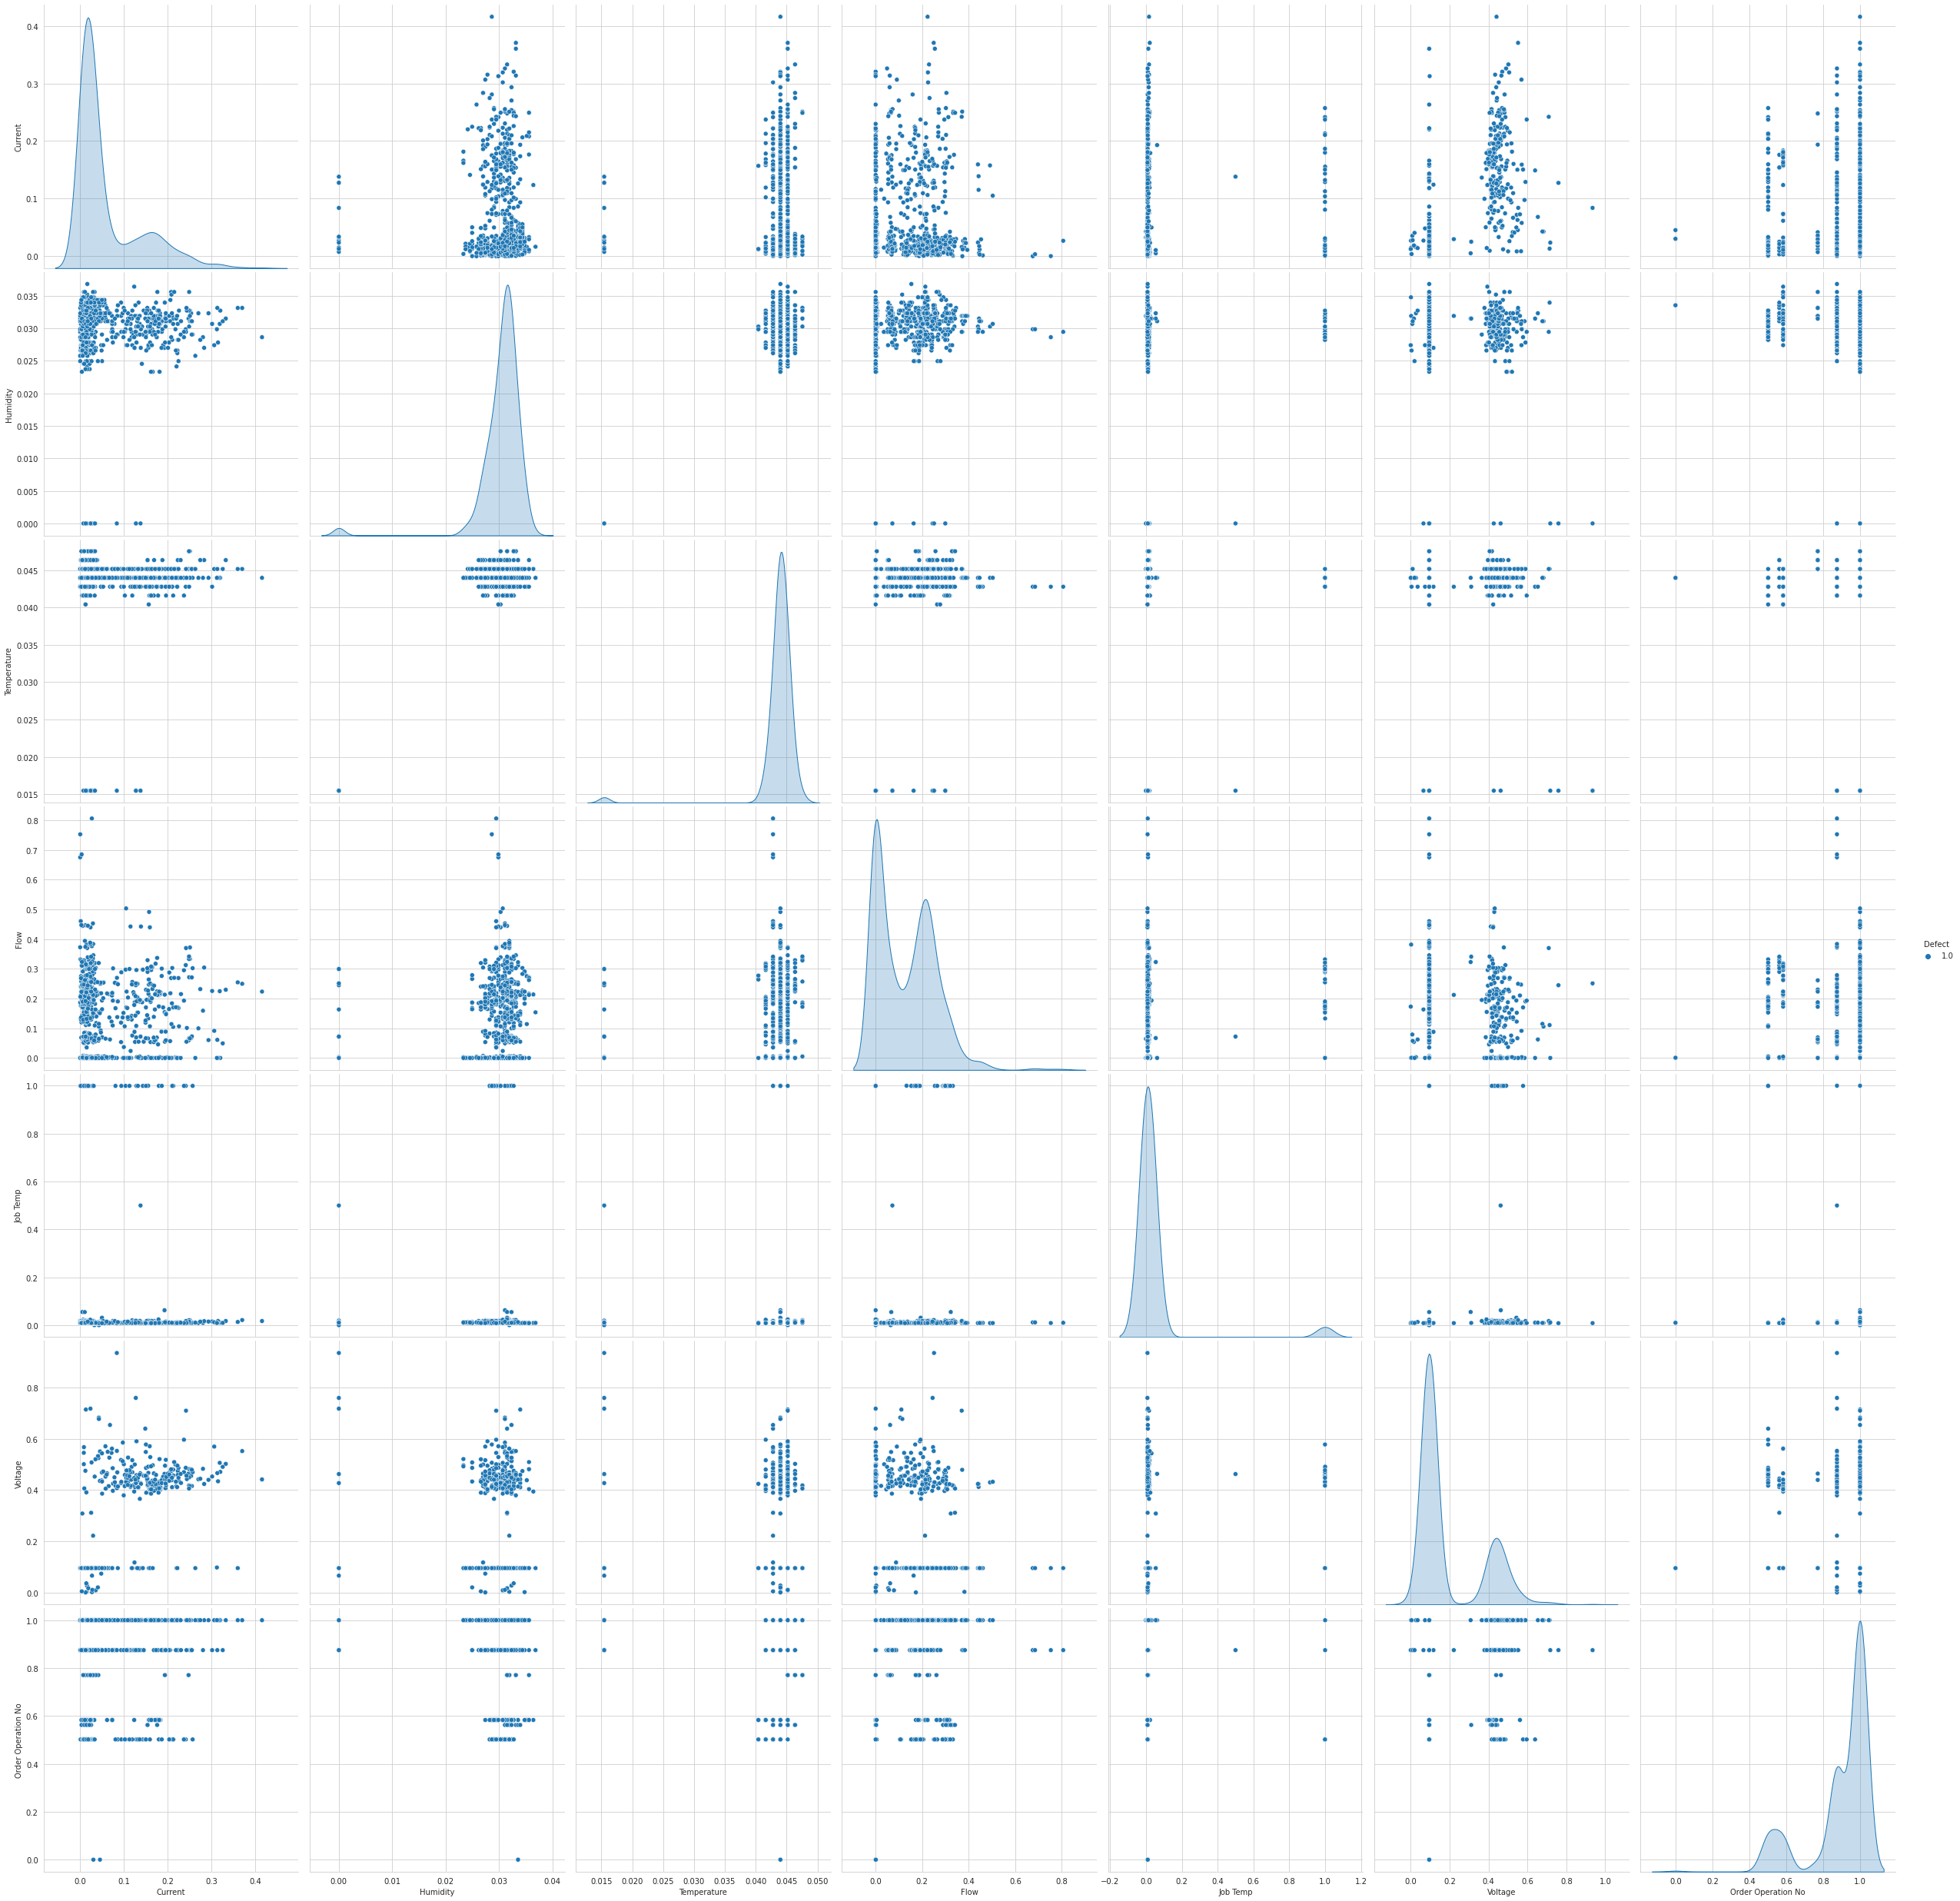

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_p,hue ="Defect" ,size=5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


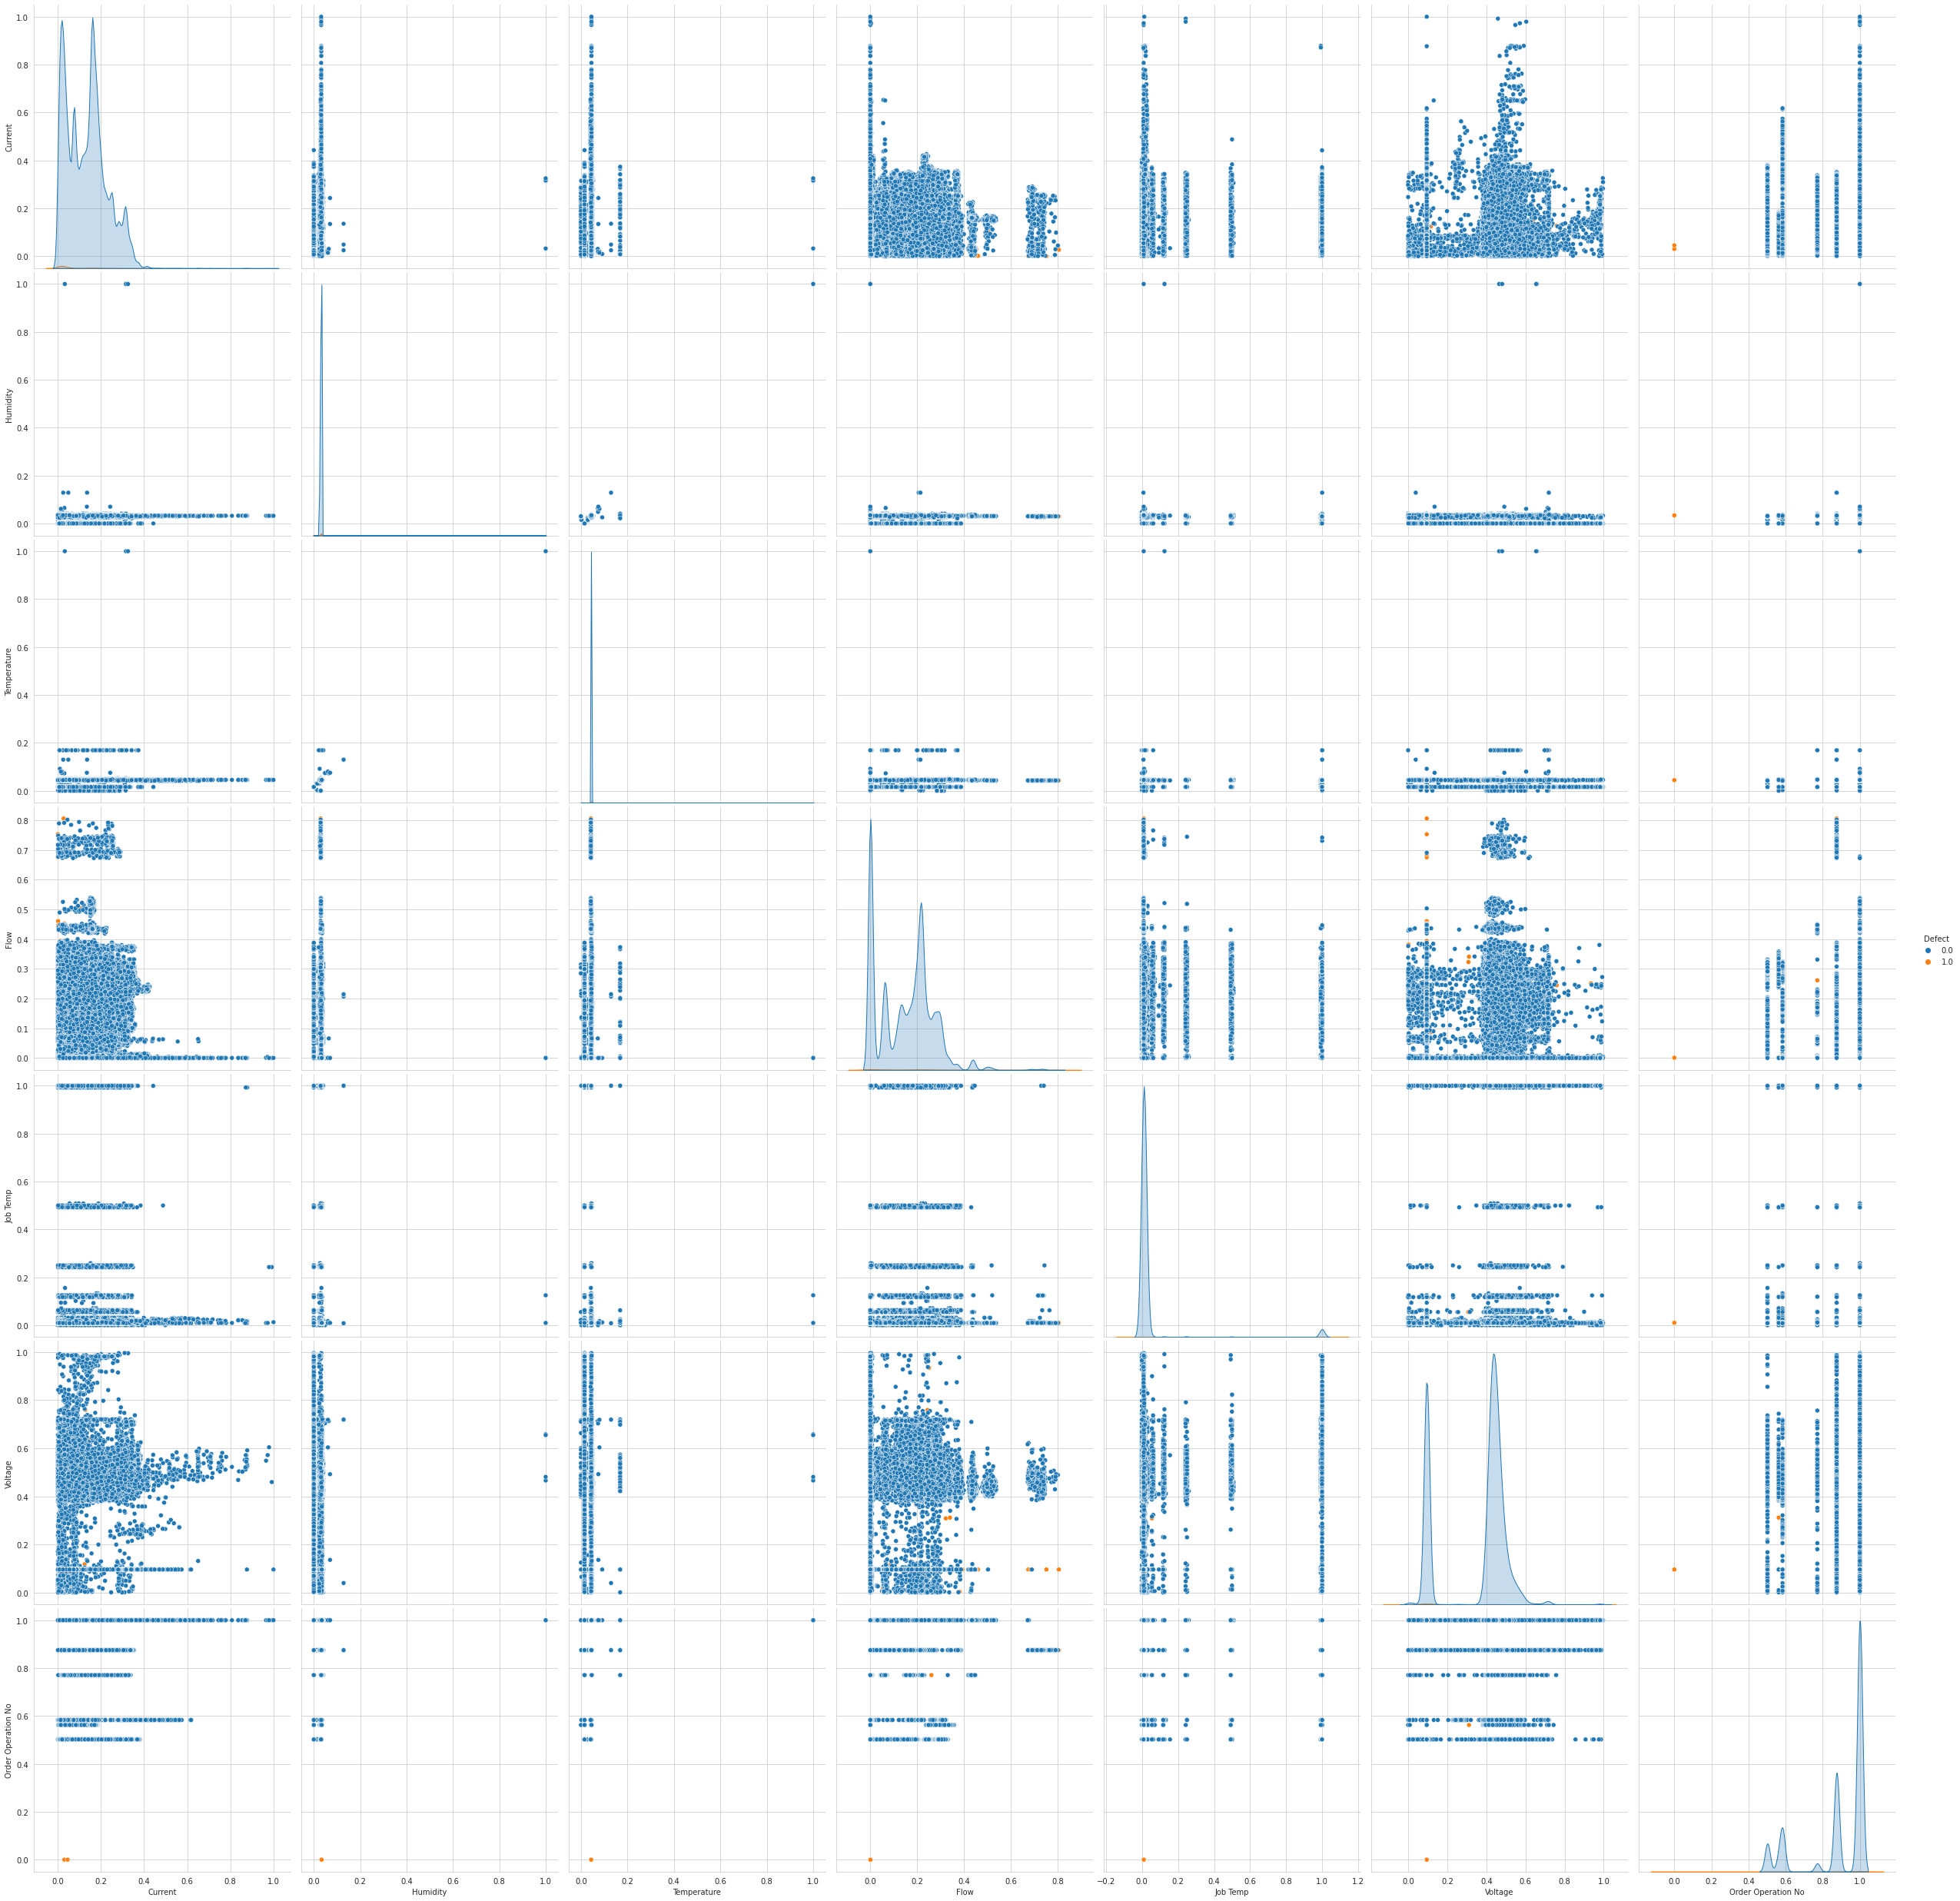

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_p_nd_n,hue ="Defect" ,size=5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


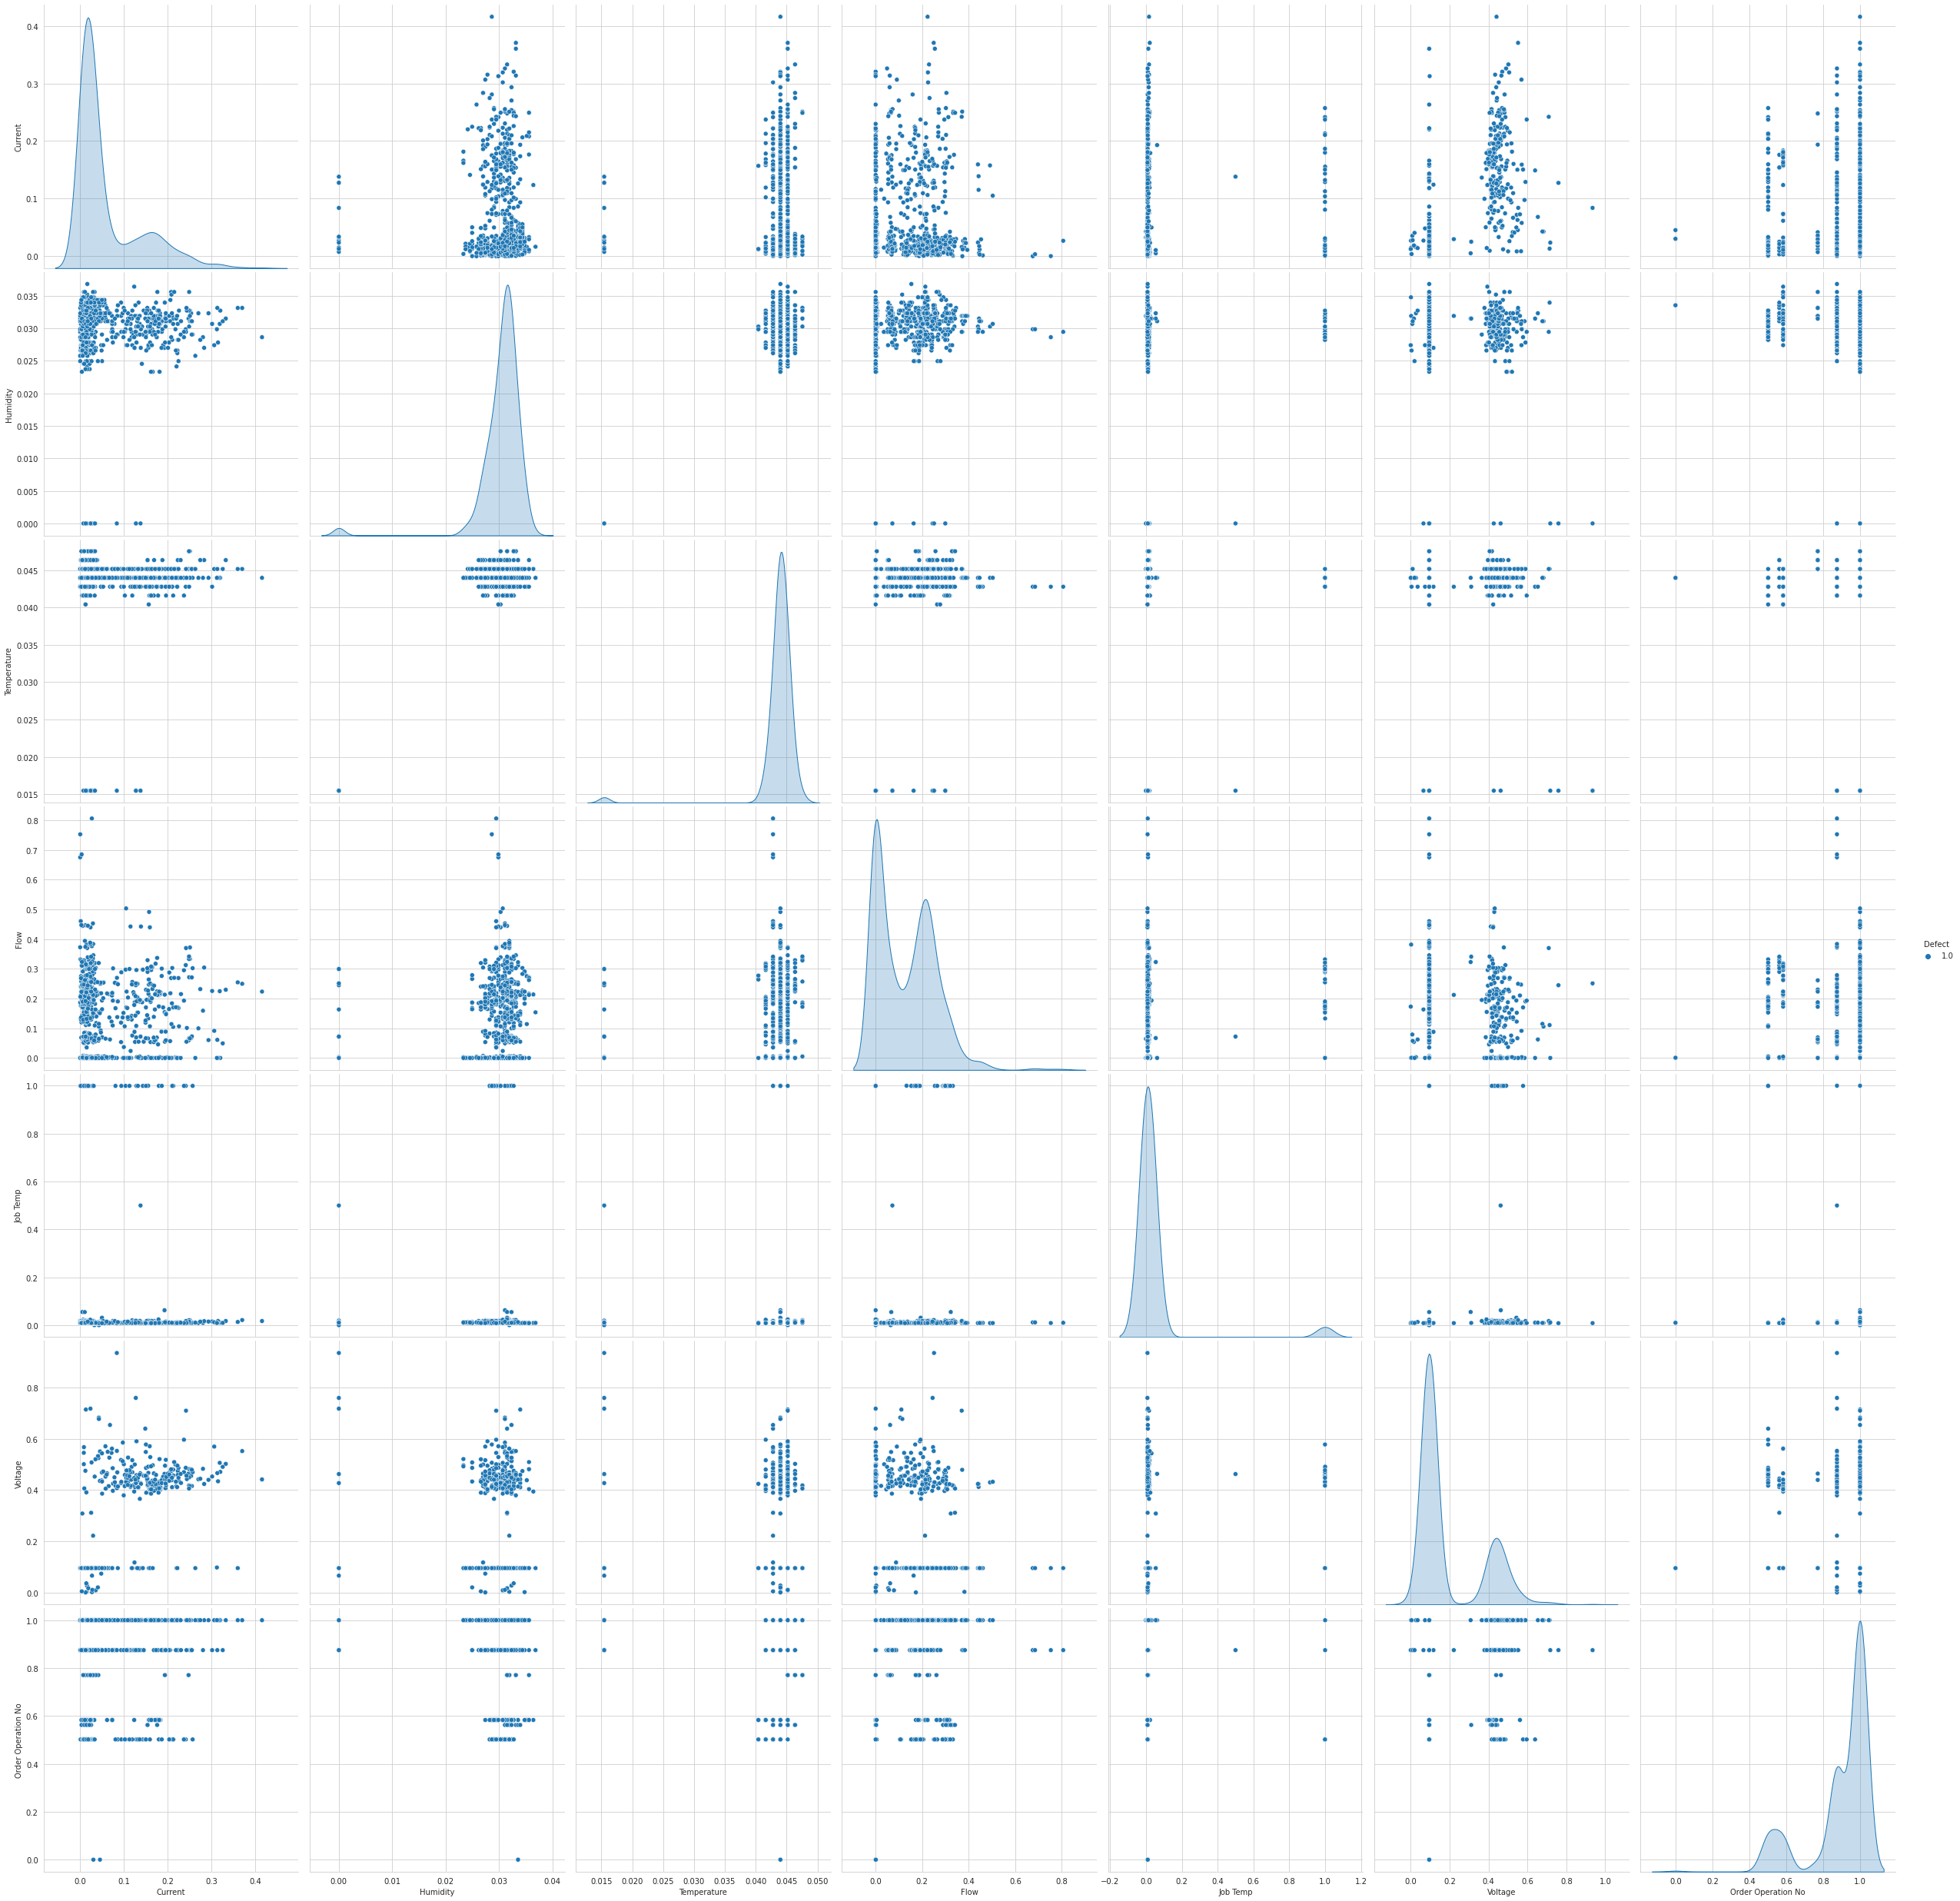

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_p,hue ="Defect" ,size=2)
plt.show()

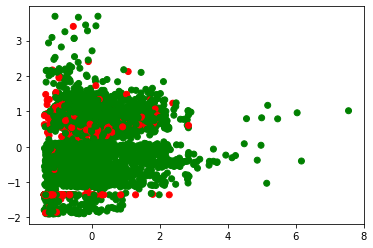

In [ ]:
color= ['red' if l == 0 else 'green' for l in y_p_nd_test_en]
color_train= ['red' if l == 0 else 'green' for l in y_p_nd_train_rus_en]
plt.scatter(x_p_nd_train_rus_sca[:,0],x_p_nd_train_rus_sca[:,1],c = color_train )

In [ ]:
from sklearn.manifold import TSNE
# TSNE
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points


model = TSNE(n_components = 3, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(x_p_nd_train_sm_sca)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, y_p_nd_train_sm_en)).T
tsne_df = pd.DataFrame(data = tsne_data,
	columns =("Dim_1", "Dim_2","Dim_3", "label"))

# Plotting the result of tsne
import plotly.express as px
fig = px.scatter_3d(tsne_df, x='Dim_1', y='Dim_2', z='Dim_3',
              color='label')
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
fig = px.scatter_3d(tsne_df, x='Dim_1', y='Dim_2', z='Dim_3',
              color='label')
fig.show()

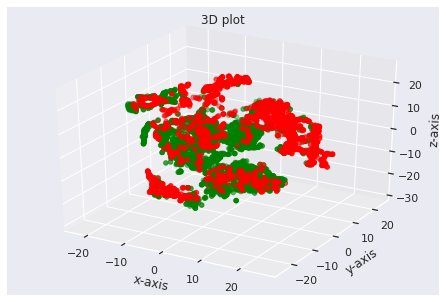

In [ ]:
color_train= ['red' if l == 0 else 'green' for l in tsne_data[:,3] ]

fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_geeks = ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=color_train)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
x_p_nd_train_lda = lda.fit(x_p_nd_train_rus_sca,y_p_nd_train_rus_en).transform(x_p_nd_train_rus_sca)
#x_p_nd_train_lda = lda.fit(x_p_nd_train_sm_sca,y_p_nd_train_sm_en).transform(x_p_nd_train_sm_sca)
x_p_nd_test_lda = lda.transform(x_p_nd_test_sca)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       1.00      0.77      0.87     73894
           1       0.00      0.22      0.00       103

    accuracy                           0.77     73997
   macro avg       0.50      0.50      0.44     73997
weighted avg       1.00      0.77      0.87     73997



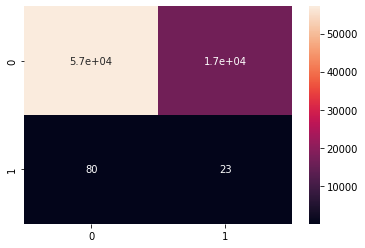

In [ ]:
prediction = lda.predict(x_p_nd_test_fil)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
print(classification_report(y_p_nd_test_en,prediction))
cf_rfc_matrix = confusion_matrix(y_p_nd_test_en,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)

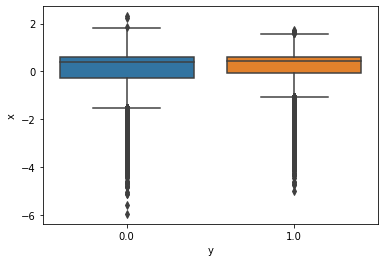

In [ ]:
x_p_nd_train_lda = x_p_nd_train_lda.reshape(-1,1)
y_p_nd_train_sm_en = y_p_nd_train_sm_en.reshape(-1,1)
concat_xy = np.concatenate((x_p_nd_train_lda,y_p_nd_train_sm_en),axis = 1)
box_df = pd.DataFrame(data = concat_xy,columns = ['x','y'])
import seaborn as sns
sns.boxplot(x = 'y' , y = 'x' , data = box_df )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       1.00      0.88      0.94     73894
           1       0.00      0.12      0.00       103

    accuracy                           0.88     73997
   macro avg       0.50      0.50      0.47     73997
weighted avg       1.00      0.88      0.93     73997



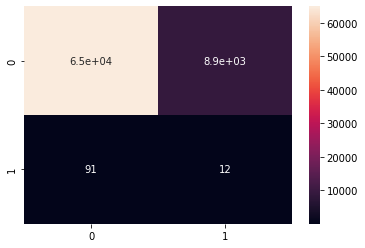

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_p_nd_train_rus_sca, y_p_nd_train_rus_en)
prediction = clf.predict(x_p_nd_test)
print(classification_report(y_p_nd_test_en,prediction))
cf_rfc_matrix = confusion_matrix(y_p_nd_test_en,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)



In [ ]:
df_p_nd_sorted

Current  Humidity  Temperature      Flow  Job Temp   Voltage  \
1313    0.019091  0.032733     0.045184  0.194886  0.015381  0.095277   
1997    0.055636  0.034370     0.045184  0.000000  0.008667  0.095277   
2054    0.138121  0.000000     0.015458  0.071873  0.499802  0.462340   
3120    0.029879  0.033142     0.047562  0.186593  0.010132  0.095277   
5106    0.011758  0.028642     0.042806  0.212163  0.008881  0.095277   
...          ...       ...          ...       ...       ...       ...   
665953  0.205273  0.028642     0.045184  0.197650  0.012665  0.517740   
665954  0.161818  0.032733     0.043995  0.134070  0.008850  0.483110   
665955  0.140788  0.031097     0.041617  0.193504  0.008454  0.479378   
665961  0.024000  0.034370     0.043995  0.000000  0.008820  0.095277   
665966  0.245212  0.034370     0.045184  0.218383  0.009796  0.437763   

        Order Operation No  Defect  
1313              1.000000     1.0  
1997              1.000000     1.0  
2054              0.875000     1.0  
3120              0.770833     1.0  
5106              0.583333     1.0  
...                    ...     ...  
665953            1.000000     0.0  
665954            1.000000     0.0  
665955            0.502083     0.0  
665961            1.000000     0.0  
665966            1.000000     0.0  

[219217 rows x 8 columns]

In [ ]:
df_p_nd_sorted = mmca.inverse_transform(df_p_nd_n)
df_p_nd_test = mmca.inverse_transform(df_p_nd_test_scaled)

In [ ]:
df_p_nd_sorted = pd.DataFrame(data = df_p_nd_sorted , columns =("Current", "Humidity","Temperature", "Flow","Job Temp","Voltage","Order Operation No","Defect"))

In [ ]:
#df_p_nd_sorted = pd.concat([df_p,df_nd_sorted])
x_p_nd_train = df_p_nd_sorted.drop(columns ='Defect',axis = 1)
y_p_nd_train = df_p_nd_sorted['Defect']

In [ ]:
y_p_nd_test_en = le.fit_transform(y_p_nd_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_p_nd_train_sc = scaler.fit_transform(x_p_nd_train_sm)
x_p_nd_test_sc = scaler.transform(x_p_nd_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_p_nd_train_sm_en = le.fit_transform(y_p_nd_train_sm)
y_p_nd_train_en = le.fit_transform(y_p_nd_train_sm)


Best features for rfc  ('0', '1', '2', '3', '4', '5', '6')


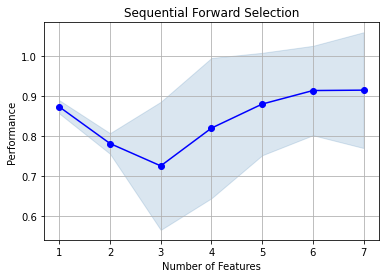

In [ ]:
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs_rfc = SFS(RandomForestClassifier(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 10)
sfs_svm = SFS(svm.SVC(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 10)
sfs_gb = SFS(GaussianNB(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 10)

sfs_knn = SFS(KNeighborsClassifier(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 10)

sfs_rfc.fit(x_p_nd_train_sc, y_p_nd_train_en)
print("Best features for rfc ",sfs_rfc.k_feature_names_)
#sfs_svm.fit(x_p_nd_train_5_sc, y_p_nd_train_en)
#print("Best features for svm ",sfs_rfc.k_feature_names_)
#sfs_gb.fit(x_p_nd_train_5_sc, y_p_nd_train_en)
#print("Best features for gb ",sfs_rfc.k_feature_names_)
#sfs_knn.fit(x_p_nd_train_5_sc, y_p_nd_train_en)
#print("Best features for knn ",sfs_rfc.k_feature_names_)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_rfc.get_metric_dict(), kind='std_dev')
#fig2 = plot_sfs(sfs_svm.get_metric_dict(), kind='std_dev')
#fig3 = plot_sfs(sfs_gb.get_metric_dict(), kind='std_dev')
#fig4 = plot_sfs(sfs_knn.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
y_p_nd_train.value_counts()


No Defect    665043
Porosity        926
Name: Defect, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns

X_train_n = x_p_nd_train_sm
y_train_n = y_p_nd_train_sm

for i in range(0,7):
  for j in range(i+1):
    X_train_n_con = X_train_n.iloc[:, [i,j]]
    x_p_nd_test_con = x_p_nd_test.iloc[:,[i,j]]
    #X_train_n_con = x_train_n[X_train_n[:,i], X_train_n[:,j]]
    rfc = RandomForestClassifier(n_estimators=100,criterion="gini",max_depth = 9)
    rfc.fit(X_train_n_con, y_train_n)
    prediction = rfc.predict(x_p_nd_test_con)
    print("Classification report for training with columns "+str(i)+" and "+str(j))
    print(classification_report(y_p_nd_test,prediction))
    cf_matrix = confusion_matrix(y_p_nd_test,prediction)
    sns.heatmap(cf_matrix, annot=True)


              precision    recall  f1-score   support

           0       1.00      0.22      0.36     73894
           1       0.00      0.83      0.00       103

    accuracy                           0.22     73997
   macro avg       0.50      0.52      0.18     73997
weighted avg       1.00      0.22      0.36     73997



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


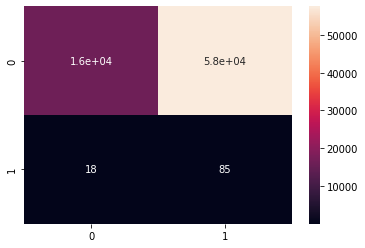

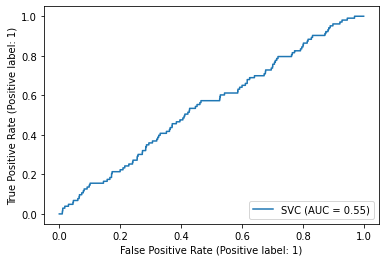

In [ ]:

#SVM

from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
from sklearn import metrics
model_p_nd_svc = svm.SVC(C=1)
model_p_nd_svc.fit(x_p_nd_train_lda,y_p_nd_train_rus_en)
prediction_svc = model_p_nd_svc.predict(x_p_nd_test_lda)
print(classification_report(y_p_nd_test_en,prediction_svc))
cf_svc_matrix = confusion_matrix(y_p_nd_test_en,prediction_svc)
sns.heatmap(cf_svc_matrix, annot=True)
metrics.plot_roc_curve(model_p_nd_svc, x_p_nd_test_lda, y_p_nd_test_en)
#perm_importance = permutation_importance(svc, x_p_nd_test, y_p_nd_test)
#sorted_idx = perm_importance.importances_mean.argsort()
#sorted_idx

              precision    recall  f1-score   support

   No Defect       1.00      0.43      0.60     73894
    Porosity       0.00      0.66      0.00       103

    accuracy                           0.43     73997
   macro avg       0.50      0.54      0.30     73997
weighted avg       1.00      0.43      0.60     73997



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


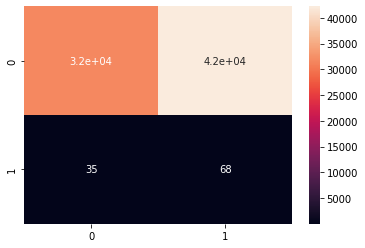

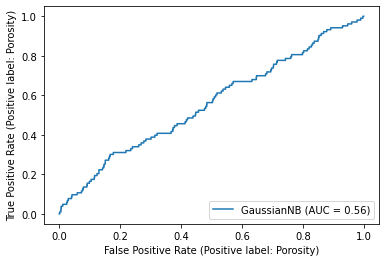

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
gb = GaussianNB()
model_nd_p_gb = gb.fit(x_p_nd_train_sm,y_p_nd_train_sm)
prediction_lr = model_nd_p_gb.predict(x_p_nd_te)
#prediction_lr_prob = prediction_lr[:,1]
print(classification_report(y_p_nd_te,prediction_lr))
cf_svc_matrix = confusion_matrix(y_p_nd_te,prediction_lr)
sns.heatmap(cf_svc_matrix, annot=True)
metrics.plot_roc_curve(model_nd_p_gb, x_p_nd_test, y_p_nd_te)

In [ ]:
models_ensemble =[]
models_ensemble.append(model_nd_ti_rfc)
models_ensemble.append(model_p_ti_brf)
models_ensemble.append(model_p_nd_svc)

In [ ]:
le.fit(y_p_nd_ti_test)

LabelEncoder()

In [ ]:
y_p_nd_ti_test_en

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
yhat_nd_ti = model_nd_ti_rfc.predict_proba(x_p_nd_ti_test)
yhat_p_ti = model_p_ti_brf.predict_proba(x_p_nd_ti_test)



In [ ]:
len(prediction)

82679

                    precision    recall  f1-score   support

         No Defect       1.00      0.43      0.60     82104
          Porosity       0.00      0.41      0.00       114
Tungsten Inclusion       0.03      0.90      0.05       461

          accuracy                           0.44     82679
         macro avg       0.34      0.58      0.22     82679
      weighted avg       0.99      0.44      0.60     82679



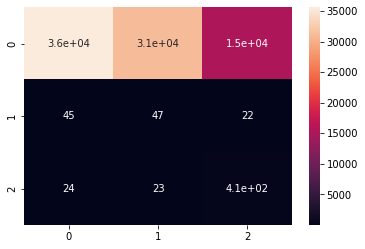

In [ ]:
print(classification_report(y_p_nd_ti_test,prediction))
cf_svc_matrix = confusion_matrix(y_p_nd_ti_test,prediction)
sns.heatmap(cf_svc_matrix, annot=True)

In [ ]:
prediction = []
for i in range(len(x_p_nd_ti_test)):
  if(yhat_nd_ti[i][1]>yhat_nd_ti[i][0] and yhat_p_ti[i][1]>yhat_p_ti[i][0]):
    prediction.append('Tungsten Inclusion')

  elif(yhat_nd_ti[i][1]>yhat_p_ti[i][0] and yhat_nd_ti[i][1]>yhat_nd_ti[i][0] and yhat_p_ti[i][0]>yhat_p_ti[i][1]):
    prediction.append('Tungsten Inclusion')

  elif(yhat_nd_ti[i][1]>yhat_p_ti[i][0] and yhat_nd_ti[i][1]<yhat_nd_ti[i][0] and yhat_p_ti[i][0]<yhat_p_ti[i][1]):
    prediction.append('Tungsten Inclusion')

  elif(yhat_nd_ti[i][0]>yhat_p_ti[i][1] and yhat_nd_ti[i][0]>yhat_nd_ti[i][1] and yhat_p_ti[i][0]<yhat_p_ti[i][1]):
    prediction.append('No Defect')

  elif(yhat_nd_ti[i][0]>yhat_p_ti[i][0] and yhat_nd_ti[i][0]>yhat_nd_ti[i][1] and yhat_p_ti[i][0]>yhat_p_ti[i][1]):
    prediction.append('No Defect')

  elif(yhat_nd_ti[i][1]<yhat_p_ti[i][0] and yhat_nd_ti[i][1]>yhat_nd_ti[i][0] and yhat_p_ti[i][0]>yhat_p_ti[i][1]):
    prediction.append('Porosity')

  elif(yhat_nd_ti[i][0]<yhat_p_ti[i][0] and yhat_nd_ti[i][0]>yhat_nd_ti[i][1] and yhat_p_ti[i][0]>yhat_p_ti[i][1]):
    prediction.append('Porosity')
  else:
    prediction.append('Porosity')



                    precision    recall  f1-score   support

         No Defect       1.00      0.19      0.32     82104
          Porosity       0.00      0.66      0.00       114
Tungsten Inclusion       0.03      0.86      0.06       461

          accuracy                           0.19     82679
         macro avg       0.34      0.57      0.13     82679
      weighted avg       0.99      0.19      0.32     82679



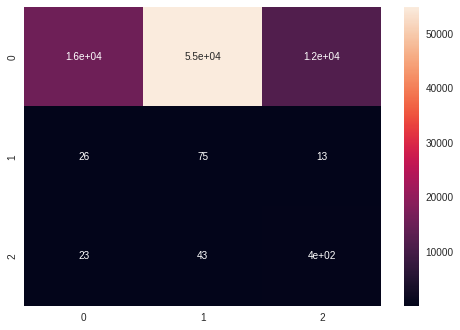

In [ ]:
from scipy import stats


yhats = [model.predict(x_p_nd_ti_test) for model in models_ensemble]
yhats = np.array(yhats)


outcomes, _ = stats.mode(yhats)
outcomes = np.transpose(outcomes)
#y_p_nd_ti_test_en = le.transform(y_p_nd_ti_test)

print(classification_report(y_p_nd_ti_test,outcomes))
cf_matrix = confusion_matrix(y_p_nd_ti_test,outcomes)
sns.heatmap(cf_matrix, annot=True)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
from sklearn import metrics
from scipy import stats


models = []
for i in range(719):
  model = svm.SVC(C=1)
  model = svc.fit(nd_p_x_dflist[i],nd_p_y_dflist[i])
  models.append(model)
# make predictions
yhats = [model.predict(x_p_nd_te) for model in models]
yhats = np.array(yhats)
outcomes, _ = stats.mode(yhats)
outcomes = np.transpose(outcomes)
y_p_nd_te_en = le.transform(y_p_nd_te)

print(classification_report(y_p_nd_te_en,outcomes))
cf_matrix = confusion_matrix(y_p_nd_te_en,outcomes)
sns.heatmap(cf_matrix, annot=True)

KeyboardInterrupt: ignored

              precision    recall  f1-score   support

           0       1.00      0.47      0.64     73894
           1       0.00      0.59      0.00       103

    accuracy                           0.47     73997
   macro avg       0.50      0.53      0.32     73997
weighted avg       1.00      0.47      0.64     73997



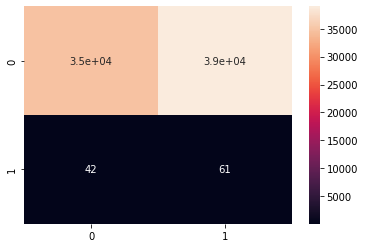

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
from sklearn import metrics
from scipy import stats


models = []
for i in range(719):
  lr = LogisticRegression(max_iter=5000)
  model = lr.fit(nd_p_x_dflist[i],nd_p_y_dflist[i])
  models.append(model)
# make predictions
yhats = [model.predict(x_p_nd_te) for model in models]
yhats = np.array(yhats)
outcomes, _ = stats.mode(yhats)
outcomes = np.transpose(outcomes)
y_p_nd_te_en = le.transform(y_p_nd_te)

print(classification_report(y_p_nd_te_en,outcomes))
cf_matrix = confusion_matrix(y_p_nd_te_en,outcomes)
sns.heatmap(cf_matrix, annot=True)

              precision    recall  f1-score   support

           0       1.00      0.47      0.64     73894
           1       0.00      0.59      0.00       103

    accuracy                           0.47     73997
   macro avg       0.50      0.53      0.32     73997
weighted avg       1.00      0.47      0.64     73997



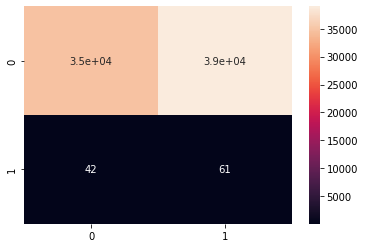

In [ ]:
print(classification_report(y_p_nd_te_en,outcomes))
cf_matrix = confusion_matrix(y_p_nd_te_en,outcomes)
sns.heatmap(cf_matrix, annot=True)

              precision    recall  f1-score   support

   No Defect       1.00      0.97      0.99     73894
    Porosity       0.00      0.06      0.01       103

    accuracy                           0.97     73997
   macro avg       0.50      0.52      0.50     73997
weighted avg       1.00      0.97      0.98     73997



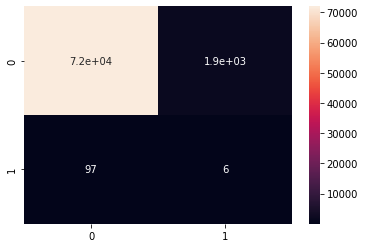

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
lr = LogisticRegression(max_iter=5000)
lr.fit(x_p_nd_train_sm,y_p_nd_train_sm)
prediction_lr = lr.predict(x_p_nd_test)
#prediction_lr_prob = prediction_lr[:,1]
print(classification_report(y_p_nd_te,prediction_lr))
cf_svc_matrix = confusion_matrix(y_p_nd_te,prediction_lr)
sns.heatmap(cf_svc_matrix, annot=True)



              precision    recall  f1-score   support

           0       1.00      0.51      0.67     73894
           1       0.00      0.56      0.00       103

    accuracy                           0.51     73997
   macro avg       0.50      0.54      0.34     73997
weighted avg       1.00      0.51      0.67     73997



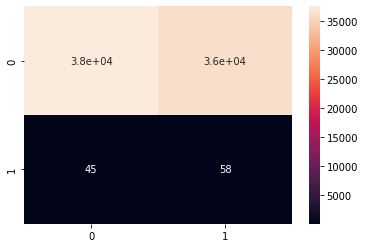

In [ ]:
#prediction_lr = thres_sel(prediction_lr_prob,x_p_nd_te,0.5069)


              precision    recall  f1-score   support

   No Defect       1.00      0.97      0.98     73894
    Porosity       0.00      0.08      0.01       103

    accuracy                           0.97     73997
   macro avg       0.50      0.52      0.50     73997
weighted avg       1.00      0.97      0.98     73997



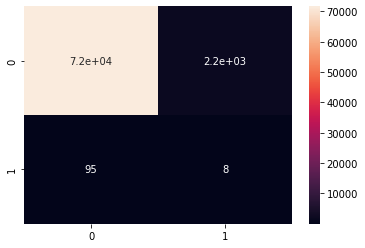

In [ ]:
#prediction_lr = thres_sel(prediction_lr_prob,x_p_nd_te,0.414)


In [ ]:
len(y_p_nd_te_en)

73997

In [ ]:
def thres_sel(prediction_lr_prob,x_p_nd_te,t =0.5):
  prediction = []
  for i in range(len(x_p_nd_te)):
    if prediction_lr_prob[i]>=t:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction


In [ ]:
y_p_nd_te_en = le.transform(y_p_nd_te)

              precision    recall  f1-score   support

           0       1.00      0.42      0.59     73894
           1       0.00      0.61      0.00       103

    accuracy                           0.42     73997
   macro avg       0.50      0.52      0.30     73997
weighted avg       1.00      0.42      0.59     73997



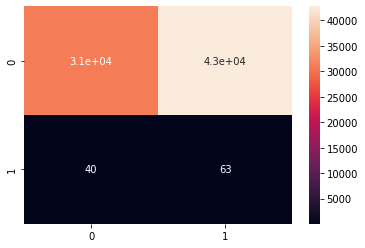

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
x_train_n = x_p_nd_train_sm
y_encoded = y_p_nd_train_sm
norm = Normalizer().fit(x_train_n)
x_train_n = norm.transform(x_train_n)
le = LabelEncoder()
y_encoded = le.fit_transform(y_encoded)

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(7,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train_n,y_encoded,epochs=100,batch_size=32,validation_split = 0.1,verbose =1)

x_test_n = x_p_nd_test
y_test_encoded = y_p_nd_test
norm = Normalizer().fit(x_test_n)
X_test_n = norm.transform(x_test_n)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test_encoded)
prediction = np.round(model.predict(X_test_n))
print(classification_report(y_test_encoded,prediction))
cf_svc_matrix = confusion_matrix(y_test_encoded,prediction)
sns.heatmap(cf_svc_matrix, annot=True)

              precision    recall  f1-score   support

   No Defect       1.00      0.47      0.63     73894
    Porosity       0.00      0.55      0.00       103

    accuracy                           0.47     73997
   macro avg       0.50      0.51      0.32     73997
weighted avg       1.00      0.47      0.63     73997



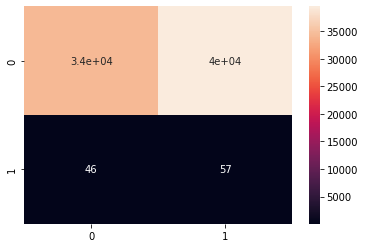

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn import metrics
import seaborn as sns

knn=KNeighborsClassifier(n_neighbors = 500)
knn.fit(x_p_nd_train_sm,y_p_nd_train_sm)
prediction = knn.predict(x_p_nd_test)
print(classification_report(y_p_nd_test,prediction))
cf_rfc_matrix = confusion_matrix(y_p_nd_test,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)

In [ ]:
x_p_tr,x_p_te = split(x_p_train)
y_p_tr,y_p_te = split(y_p_train)

x_nd_tr,x_nd_te = split(x_nd_train)
y_nd_tr,y_nd_te = split(y_nd_train)

x_p_nd_te = pd.concat([x_p_te,x_nd_te])
y_p_nd_te = pd.concat([y_p_te,y_nd_te])


In [ ]:
nd_p_x_dflist, nd_p_y_dflist = subsamples(x_nd_tr,y_nd_tr,x_p_tr,y_p_tr,926)
num_chunks = num_chunk(y_nd_train,926)
print(num_chunks)

798


In [ ]:
nd_p_y_dflist[0]

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
from sklearn import metrics
svc = svm.SVC(C=1)
from scipy import stats
models = []
for i in range(719):
  model = svc.fit(nd_p_x_dflist[i],nd_p_y_dflist[i])
  models.append(model)
# make predictions
yhats = [model.predict(x_p_nd_te) for model in models]
yhats = np.array(yhats)
# calculate mode



              precision    recall  f1-score   support

           0       1.00      0.45      0.62     73894
           1       0.00      0.62      0.00       103

    accuracy                           0.45     73997
   macro avg       0.50      0.54      0.31     73997
weighted avg       1.00      0.45      0.62     73997



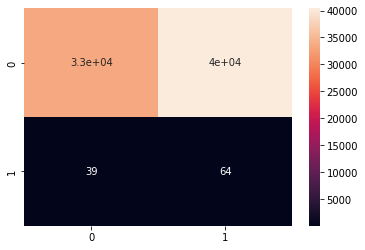

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,precision_score,recall_score
import seaborn as sns
from sklearn import metrics
from scipy import stats


models = []
for i in range(719):
  rfc = RandomForestClassifier(n_estimators=20,criterion="gini",max_depth = 9)
  model = rfc.fit(nd_p_x_dflist[i],nd_p_y_dflist[i])
  models.append(model)
# make predictions
yhats = [model.predict(x_p_nd_te) for model in models]
yhats = np.array(yhats)
outcomes, _ = stats.mode(yhats)
outcomes = np.transpose(outcomes)
y_p_nd_te_en = le.transform(y_p_nd_te)

print(classification_report(y_p_nd_te_en,outcomes))
cf_matrix = confusion_matrix(y_p_nd_te_en,outcomes)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
sorted_idx

array([2, 4, 6, 3, 1, 5, 0])

In [ ]:
import matplotlib.pyplot as plt
rfc.feature_importances_

array([0.22605276, 0.13967331, 0.0624439 , 0.19119394, 0.21831933,
       0.1161126 , 0.04620415])

In [ ]:

# example of an ensemble created from features selected with RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


def get_ensemble(n_features):

	models = list()
	for i in range(1, n_features+1):
		fs = RFE(estimator=RandomForestClassifier(n_estimators = 20), n_features_to_select=i)
		model = RandomForestClassifier(n_estimators = 20)
		pipe = Pipeline([('fs',fs), ('m', model)])
		models.append((str(i),pipe))
	ensemble = VotingClassifier(estimators=models)
	return ensemble

model = get_ensemble(X.shape[1])
model.fit(x_p_nd_train_rus,y_p_nd_train_rus)
prediction = model.predict(x_p_nd_test)
print(classification_report(y_p_nd_test,prediction))
cf_rfc_matrix = confusion_matrix(y_p_nd_test,prediction)
sns.heatmap(cf_rfc_matrix, annot=True)
metrics.plot_roc_curve(model, x_p_nd_test, y_p_nd_test)

In [ ]:
X63_train = X_train.filter(['Flow','Order Operation No'], axis=1)
X63_test = X_test.filter(['Flow','Order Operation No'], axis=1)
X60_train = X_train.filter(['Current','Order Operation No'], axis=1)
X60_test = X_test.filter(['Current','Order Operation No'], axis=1)
X43_train = X_train.filter(['Job Temp','Flow'], axis=1)
X43_test = X_test.filter(['Job Temp','Flow'], axis=1)
X40_train = X_train.filter(['Current','Job Temp'], axis=1)
X40_test = X_test.filter(['Current','Job Temp'], axis=1)
X30_train = X_train.filter(['Flow','Current'], axis=1)
X30_test = X_test.filter(['Flow','Current'], axis=1)
X20_train = X_train.filter(['Temperature','Current'], axis=1)
X20_test = X_test.filter(['Temperature','Current'], axis=1)
X10_train = X_train.filter(['Humidity','Current'], axis=1)
X10_test = X_test.filter(['Humidity','Current'], axis=1)



Flow Order Operation No
1924  0.79                180
724   3.12                180
1434  2.81                  1
192   2.79                240
1897  0.99                240
...    ...                ...
2210  2.82                240
1689   0.0                240
1060  0.01                240
713   3.03                180
2023  4.44                  1

[2057 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_war

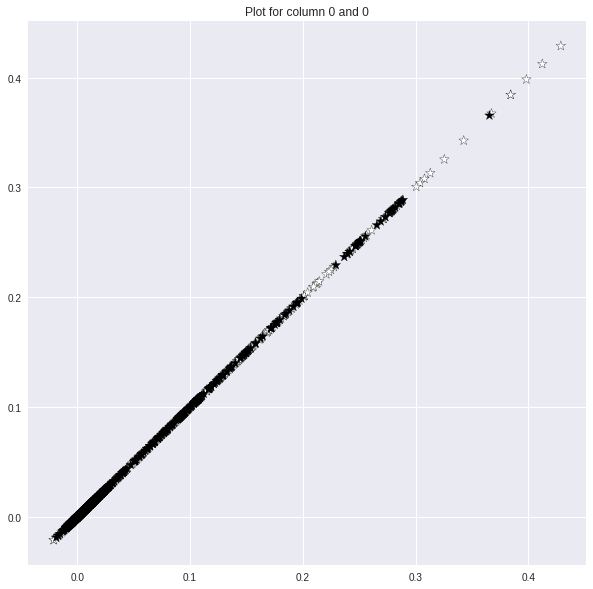

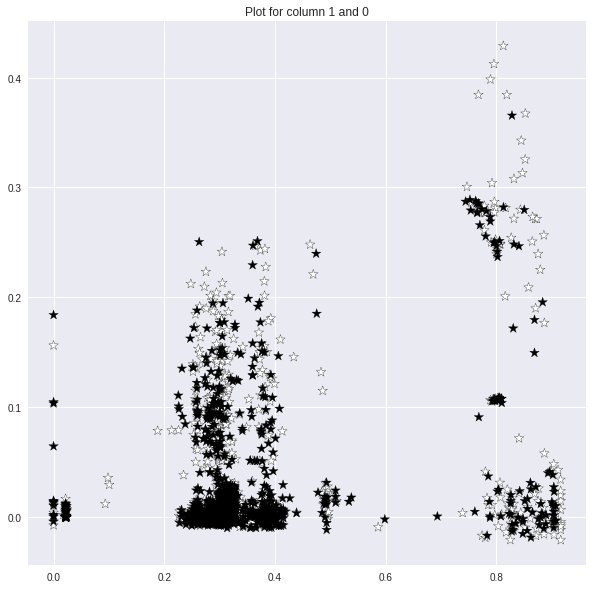

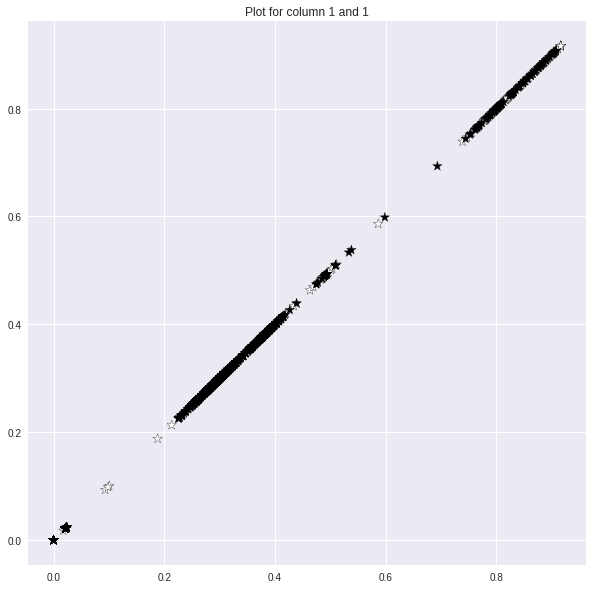

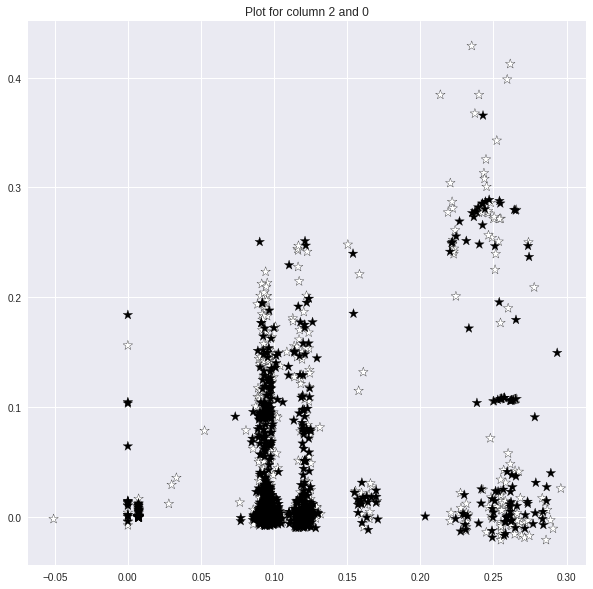

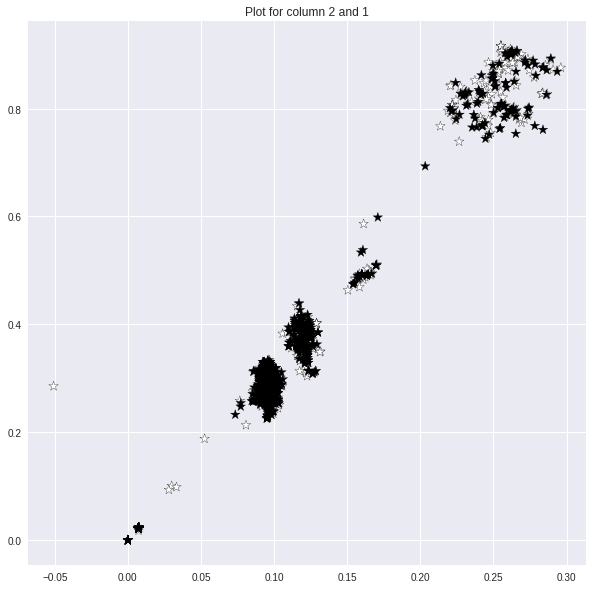

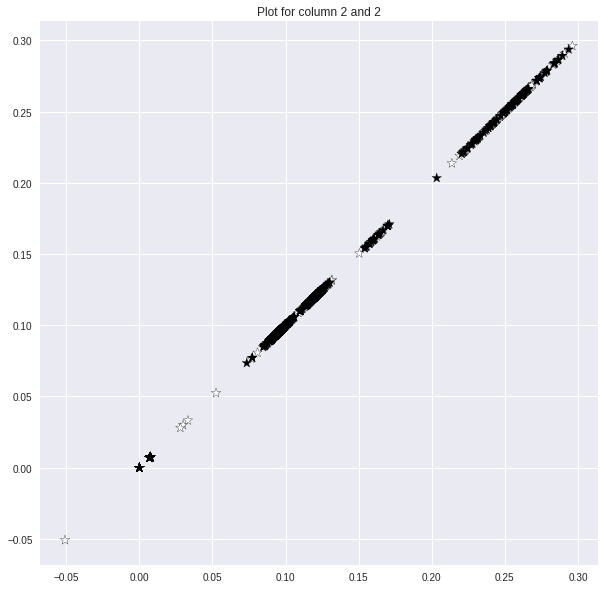

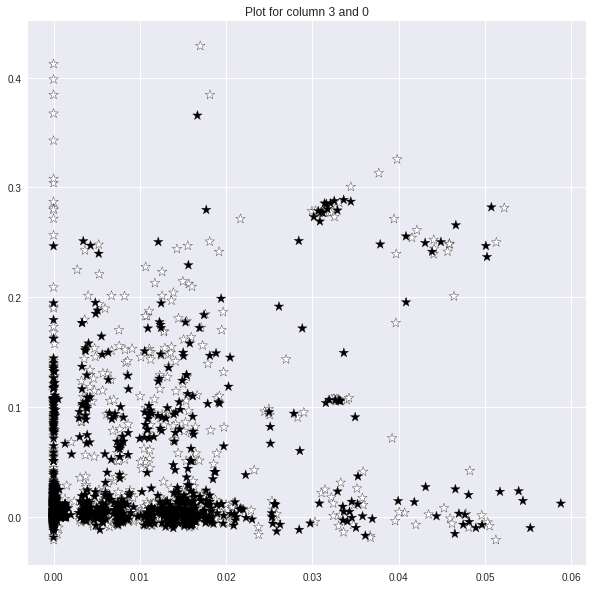

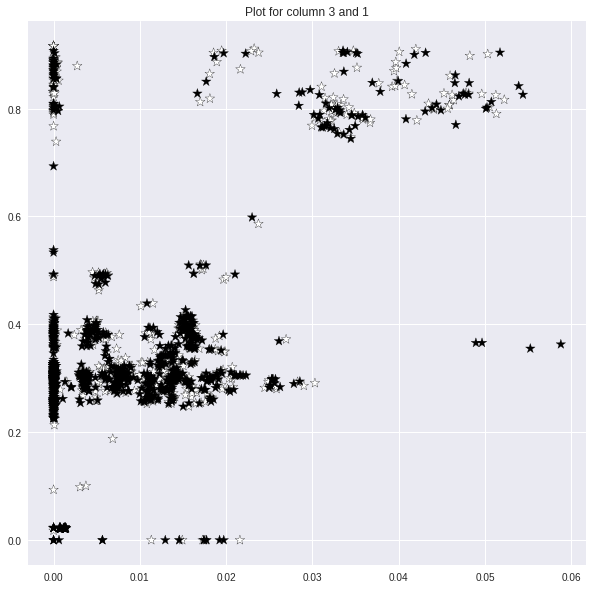

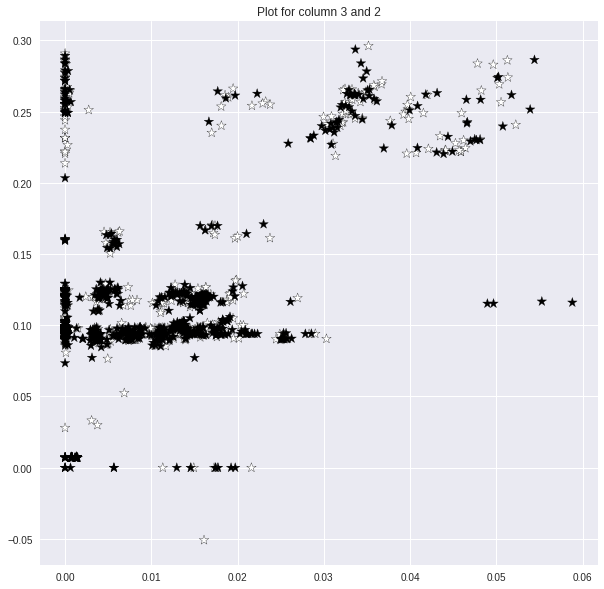

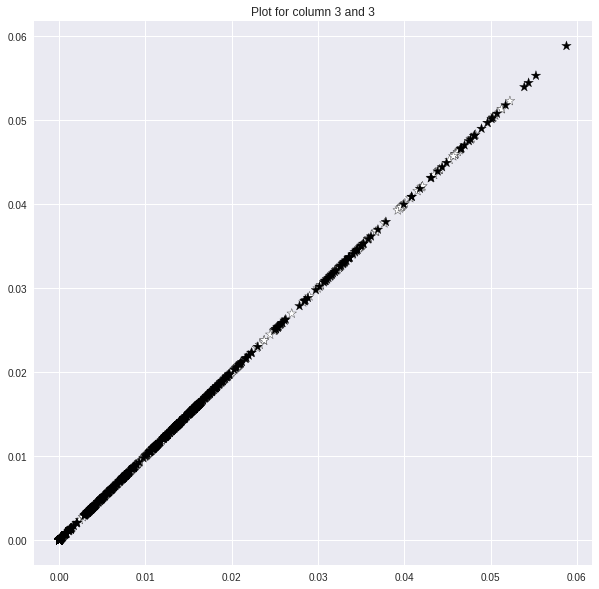

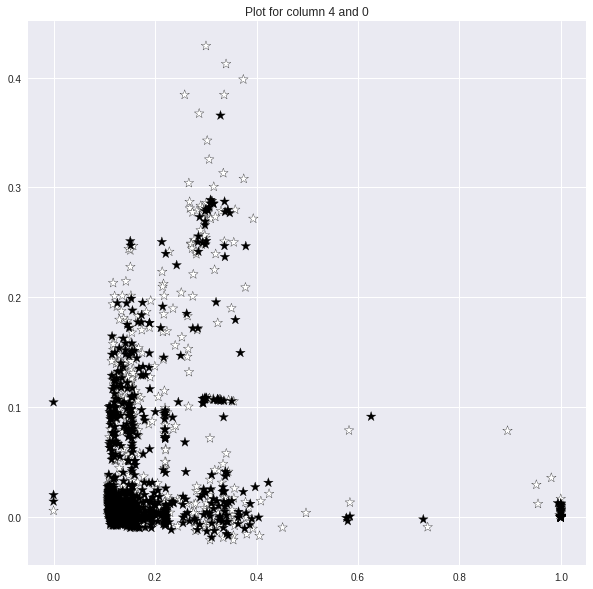

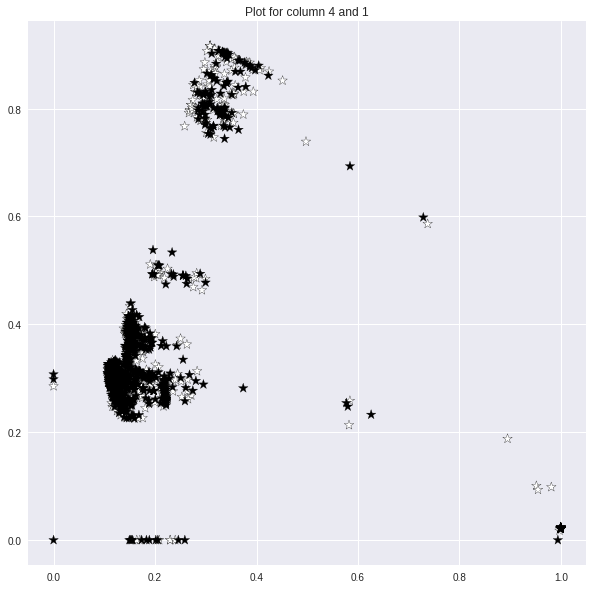

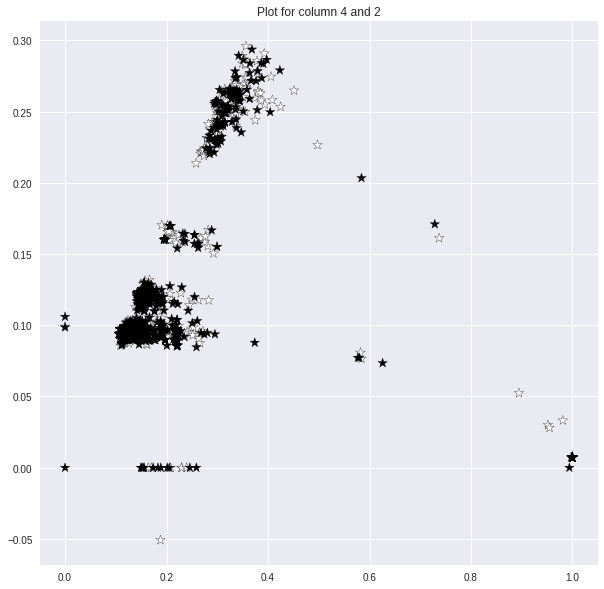

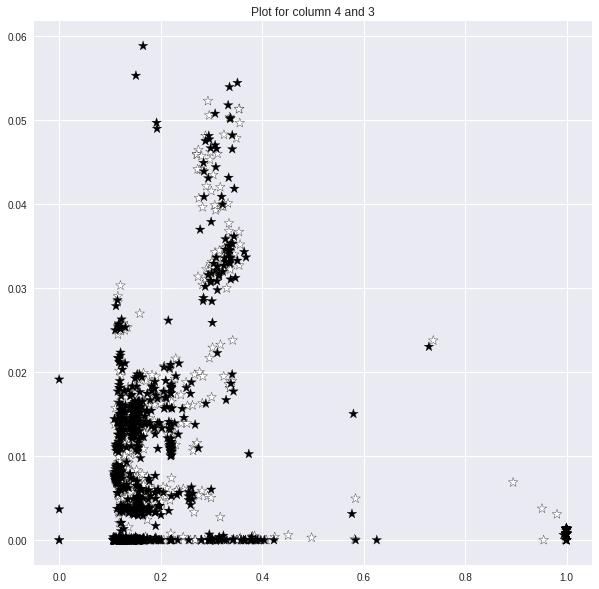

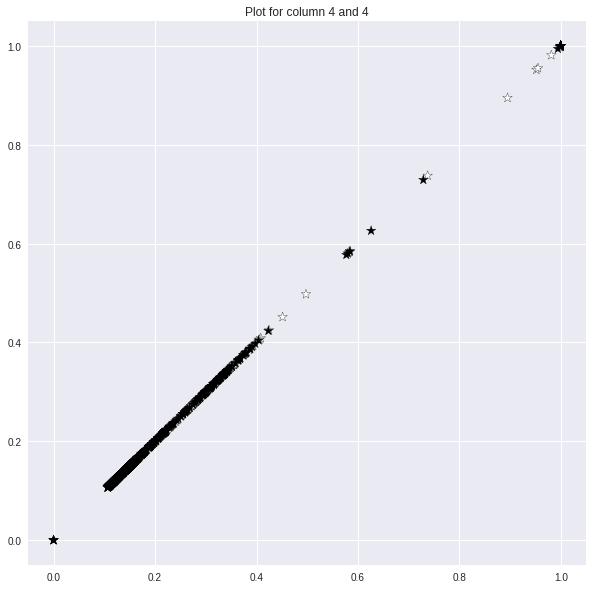

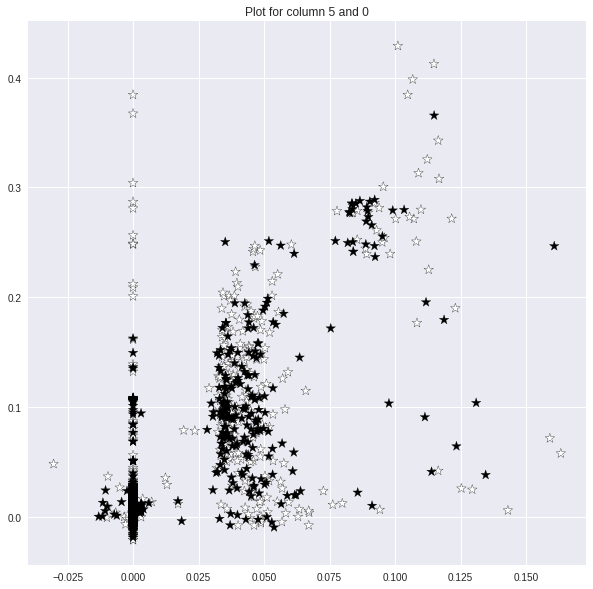

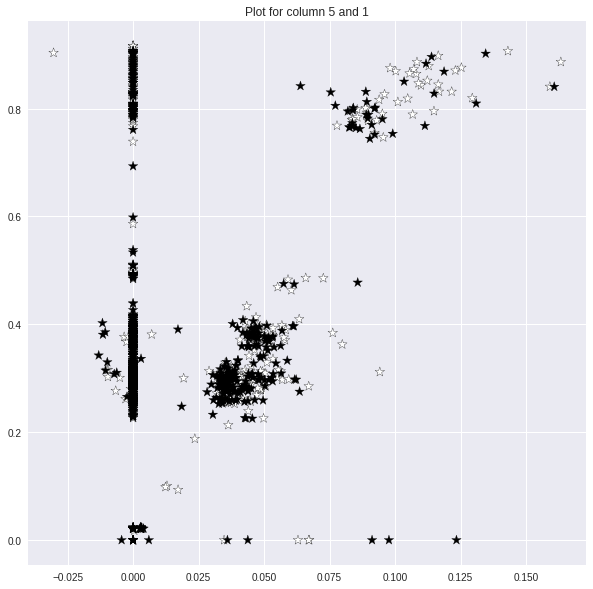

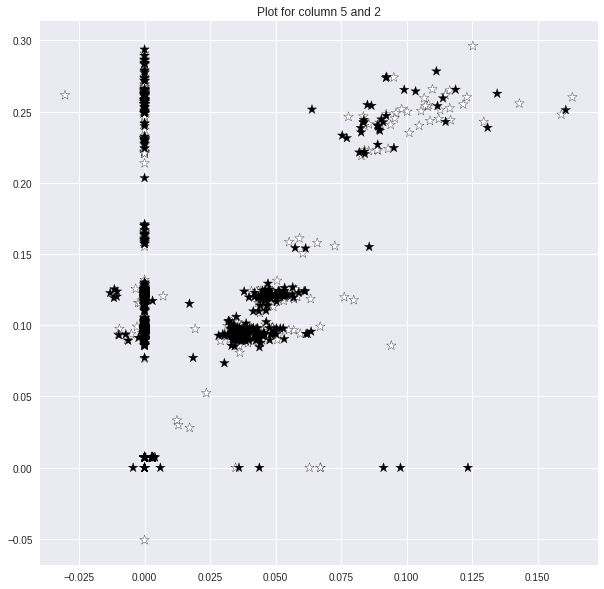

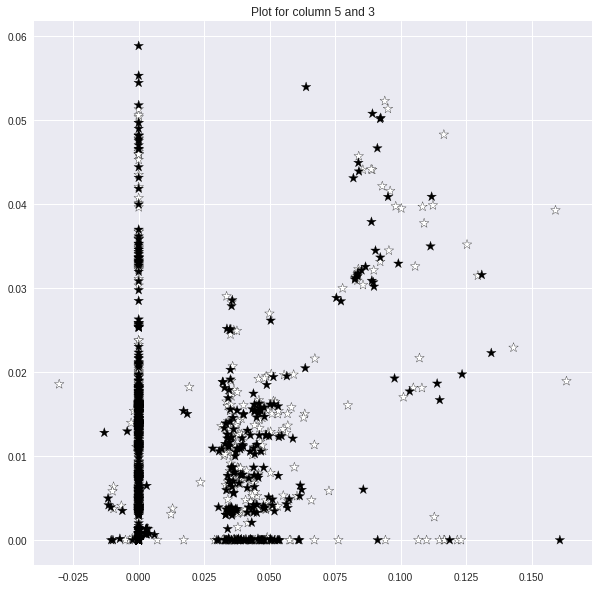

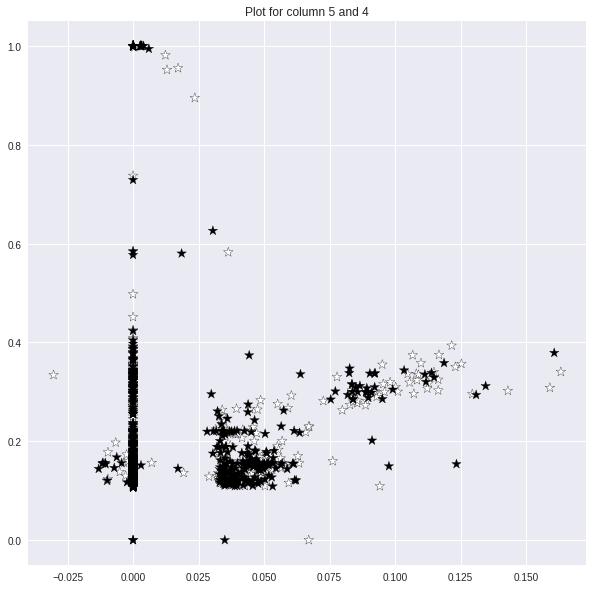

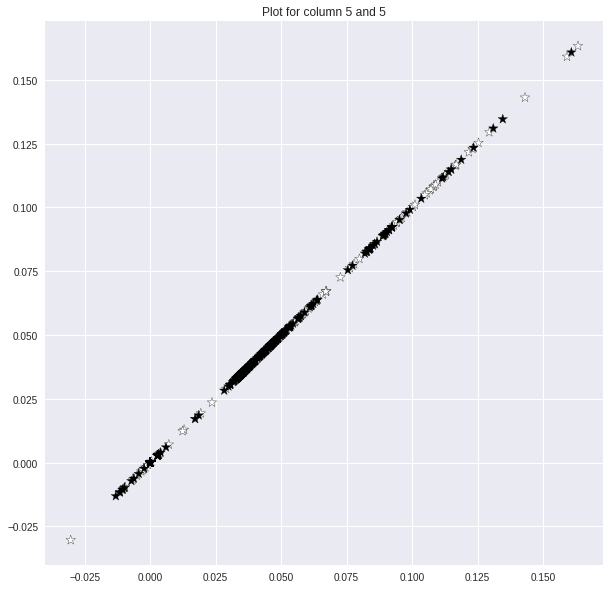

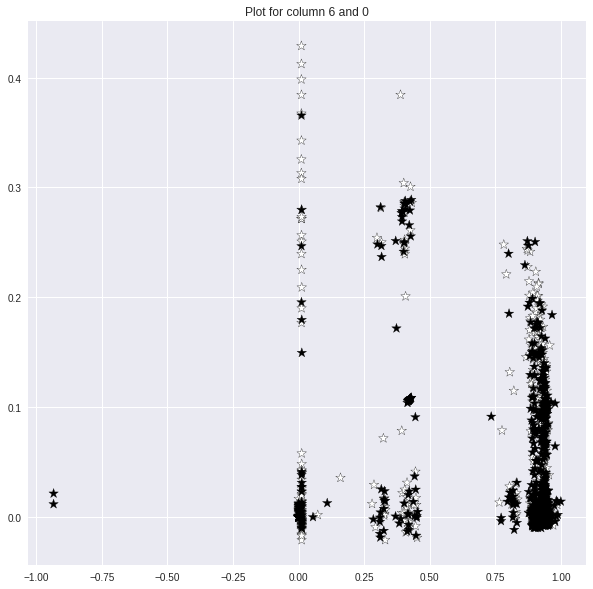

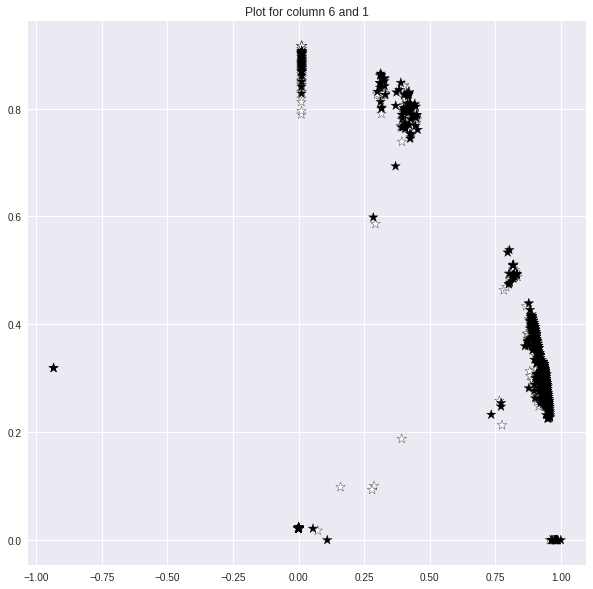

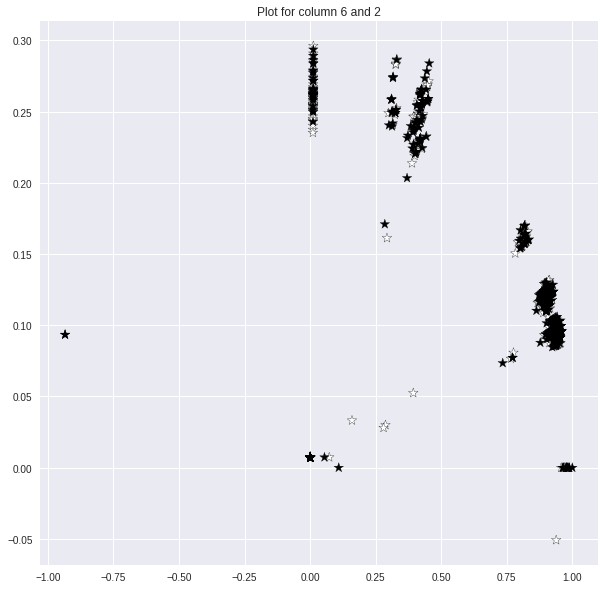

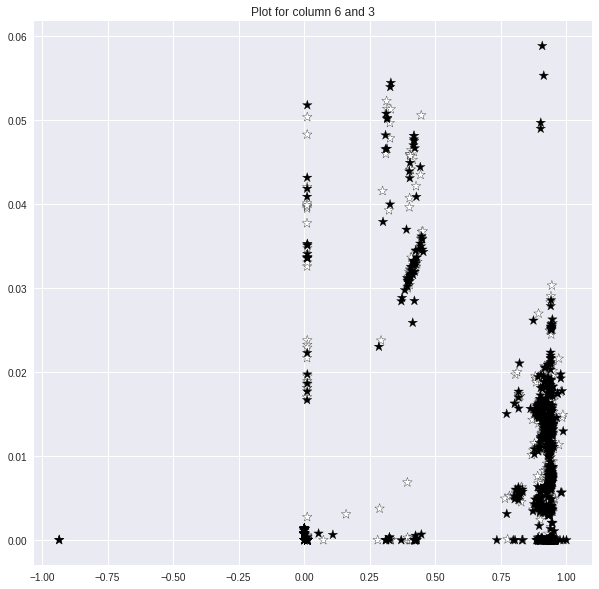

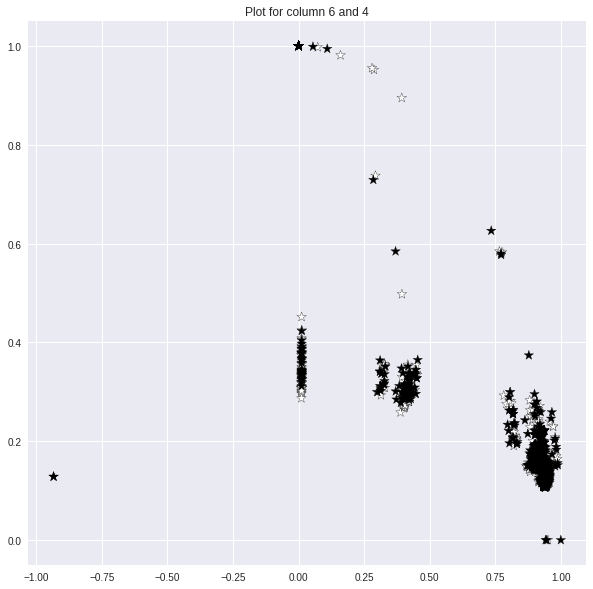

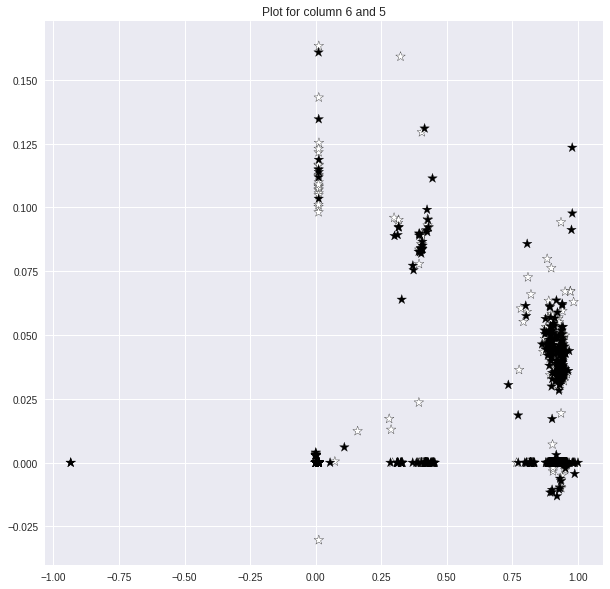

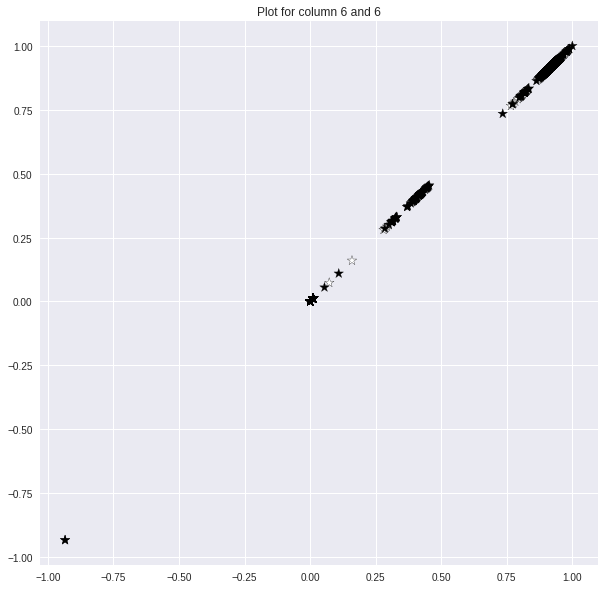

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
X_train_n = x_p_nd_train_rus
y_encoded = y_p_nd_train_rus
norm = Normalizer().fit(X_train_n)
X_train_n = norm.transform(X_train_n)
le = LabelEncoder()
y_encoded = le.fit_transform(y_encoded)
import matplotlib.pyplot as plt
k=1
for i in range(0,7):
  for j in range(i+1):
    plt.style.use('seaborn')
    plt.figure(figsize = (10,10))
    #plt.subplot(3,7,k)
    plt.title("Plot for column "+str(i)+" and "+str(j))
    plt.scatter(X_train_n[:,i], X_train_n[:,j], c=y_encoded, marker= '*',s=100,edgecolors='black')
    k+=1
plt.show()

In [ ]:
y_p_nd_train_rus.value_counts()

No Defect    926
Porosity     926
Name: Defect, dtype: int64

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
smt = BorderlineSMOTE( random_state=42,sampling_strategy = 1,kind = 'borderline-2')
x_sm, y_sm = smt.fit_resample(X_train, y_train)

array([4, 6, 3, 2, 1, 5, 0])

In [ ]:
y_sm_p = y_sm[y_sm =='Porosity']
x_sm_p = x_sm[y_sm =='Porosity']
x_rus_nd = x_rus[y_rus =='No Defect']
y_rus_nd = y_rus[y_rus =='No Defect']

In [ ]:
X_train = pd.concat([x_sm_p,x_rus_nd])
y_train = pd.concat([y_sm_p,y_rus_nd])

In [ ]:
y_train.value_counts()

Porosity     738935
No Defect    411600
Name: Defect, dtype: int64

Random Forest

In [ ]:
import pickle
filename = '/content/drive/MyDrive/Techfest/rfc_81_91_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [ ]:
x_rus = x_rus.apply(pd.to_numeric, errors='coerce')
#y_rus = y_rus.apply(pd.to_numeric, errors='coerce')

In [ ]:
paramtest = {
    'max_depth':8,
    'min_child_weight':3,
    'gamma':0.4,
    'subsample':0.7,
    'colsample_bytree':0.7,
}
data_train = xgb.DMatrix(x_rus,label = y_rus)
data_test = xgb.DMatrix(X_test,label = y_test)

model = xgb.train(paramtest,data_train,5000,evals =[(data_test,"test")],verbose_eval = 100, early_stopping_rounds=500)

In [ ]:
y_rus = y_rus.astype('category')
y_rus = y_rus.cat.codes

In [ ]:
import xgboost as xgb
xgmodel = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, num_class =3)

xgmodel = xgmodel.fit(x_rus, y_rus)
prediction = xgmodel.predict(x_rus_test)